# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Mobile Price Prediction</p>

**Hello,** I am asumming that you already have the basic knowledge of the following:

* Multiple Linear Regression
* Numpy
* Pandas
* Matplotlib
* Seaborn

If so, let us go ahead.....


<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Go through the comments in each cell for better understanding of the procedure used.</p>

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Imports</p>

In [1]:
# Kaggle Imports
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Main Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error,r2_score

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Read CSV & Basic Info</p>

In [2]:
# Reading in the dataset
data0 = pd.read_csv("Cellphone.csv")
# Creating a copy of dataset to make changes on.
data1 = data0.copy()

In [44]:
data0.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
# Shape of the dataset (number of rows, number of columns)
data1.shape

(161, 14)

In [4]:
# Column names
data1.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [5]:
# Checking for missing data (0 means no missing data)
data1.isna().sum().sum()

0

In [6]:
# This function is very useful.
#1. RangeIndex: 161 entries, 0 to 160: (Total 161 rows. i.e., from 0 to 160)
#2. Data columns (total 14 columns): (Total 14 columns. i.e., from 0 to 13)
#3. #: Column index number
#4. Column: Column names
#5. Non-Null Count: Count of the values that are not null.
#6. Dtype: Datatype of the values present with in the column.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Story of Features</p>

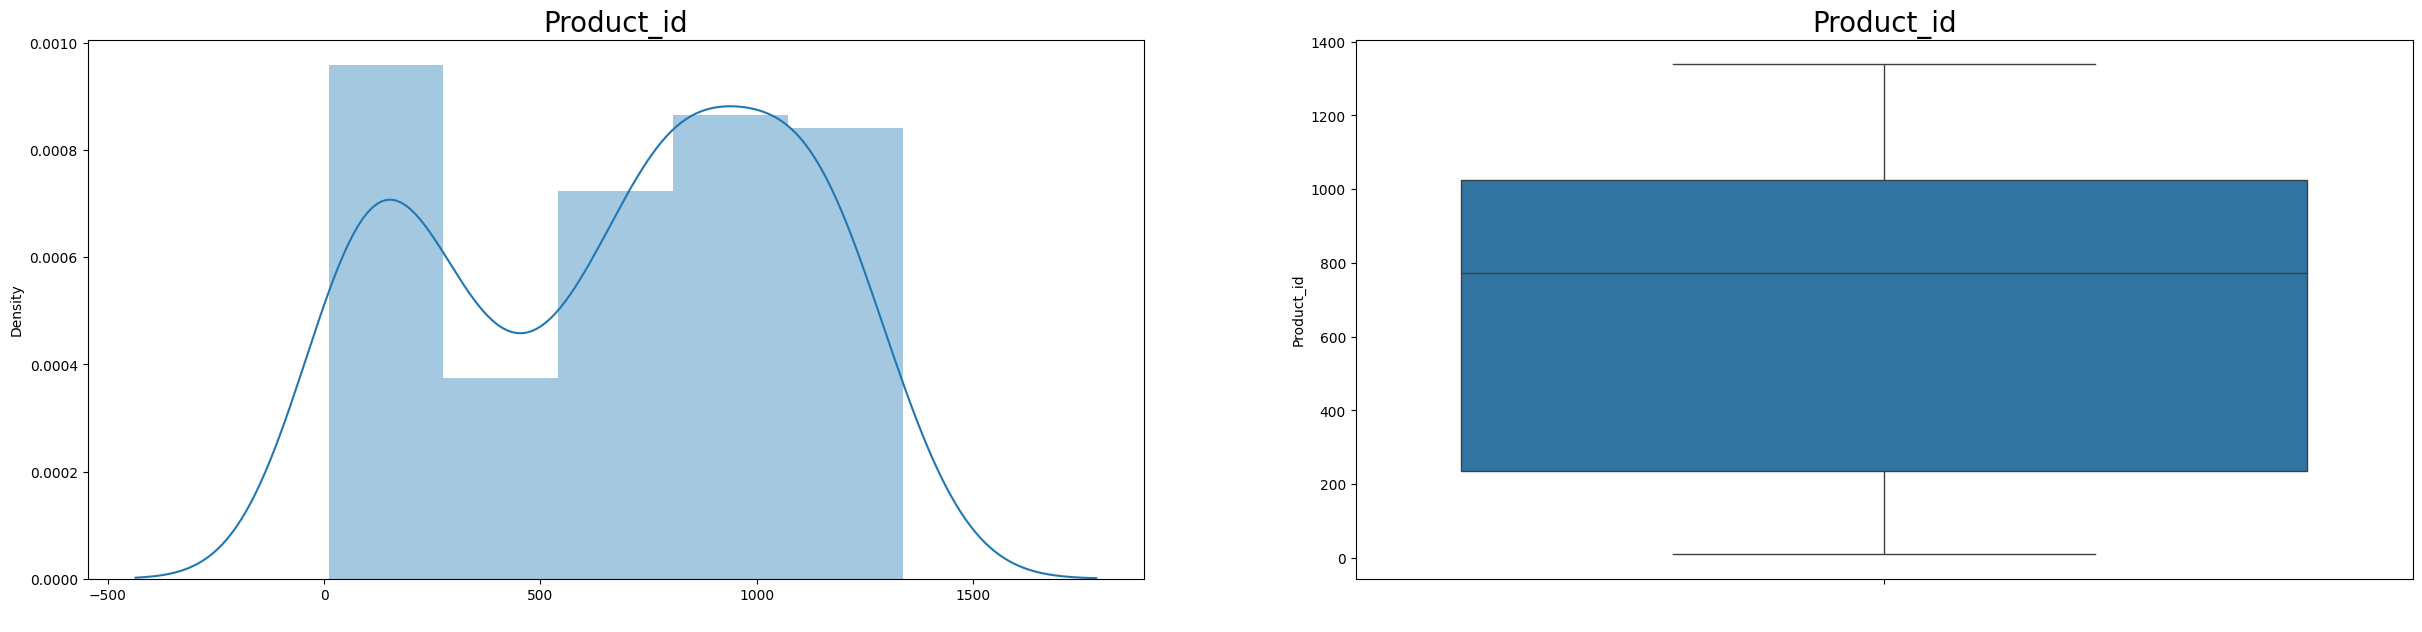

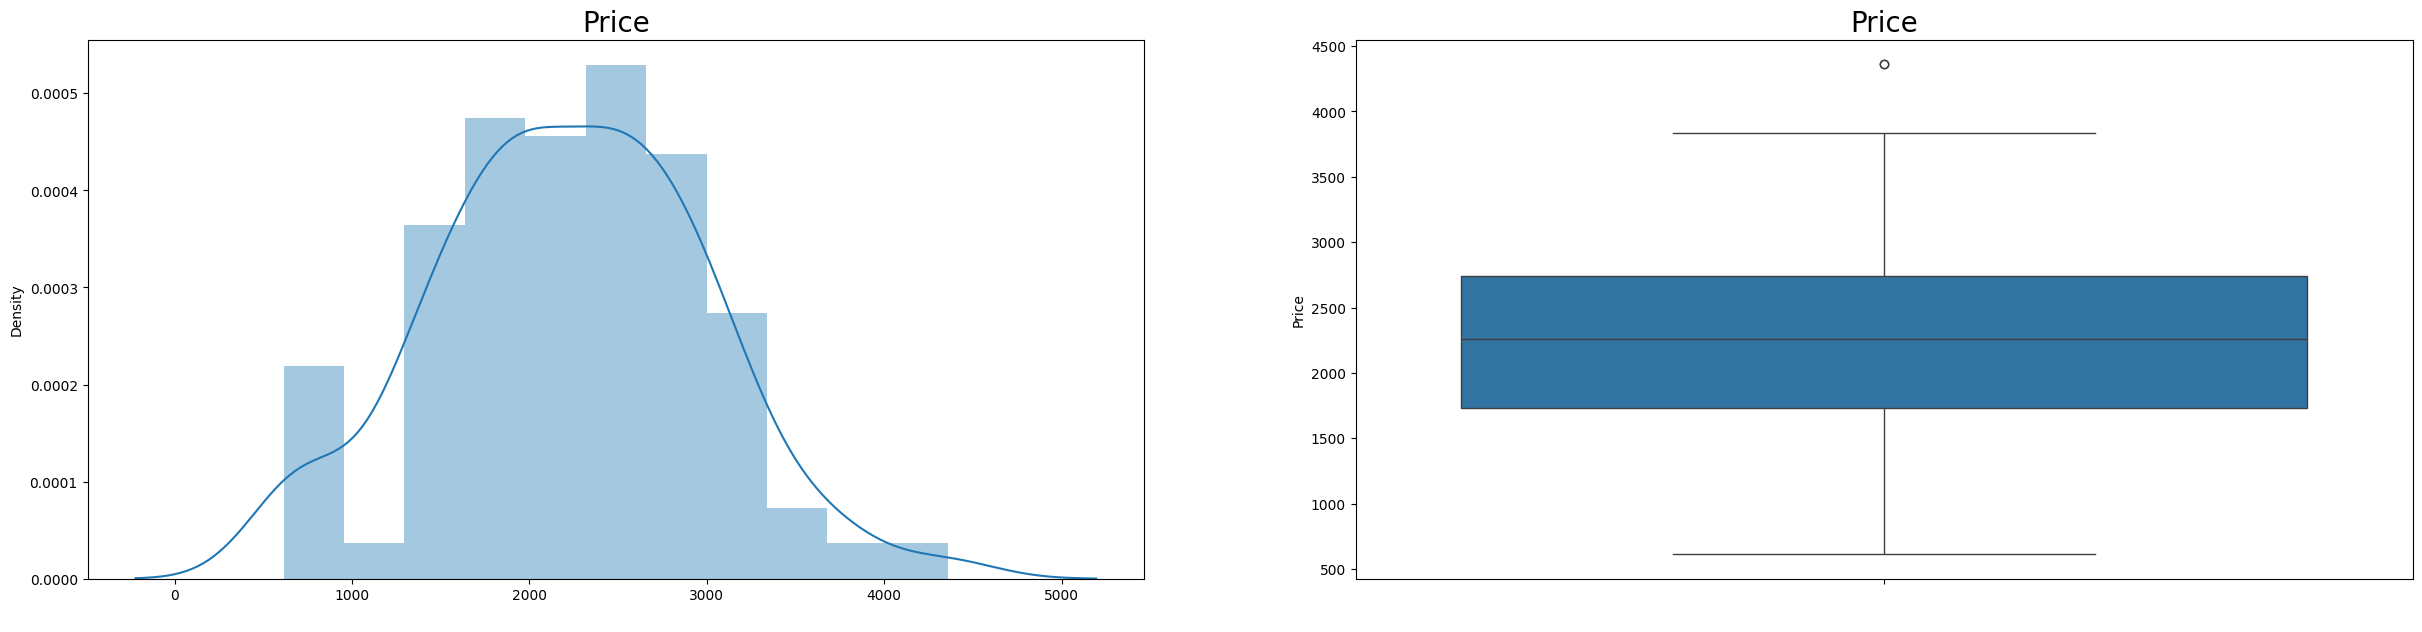

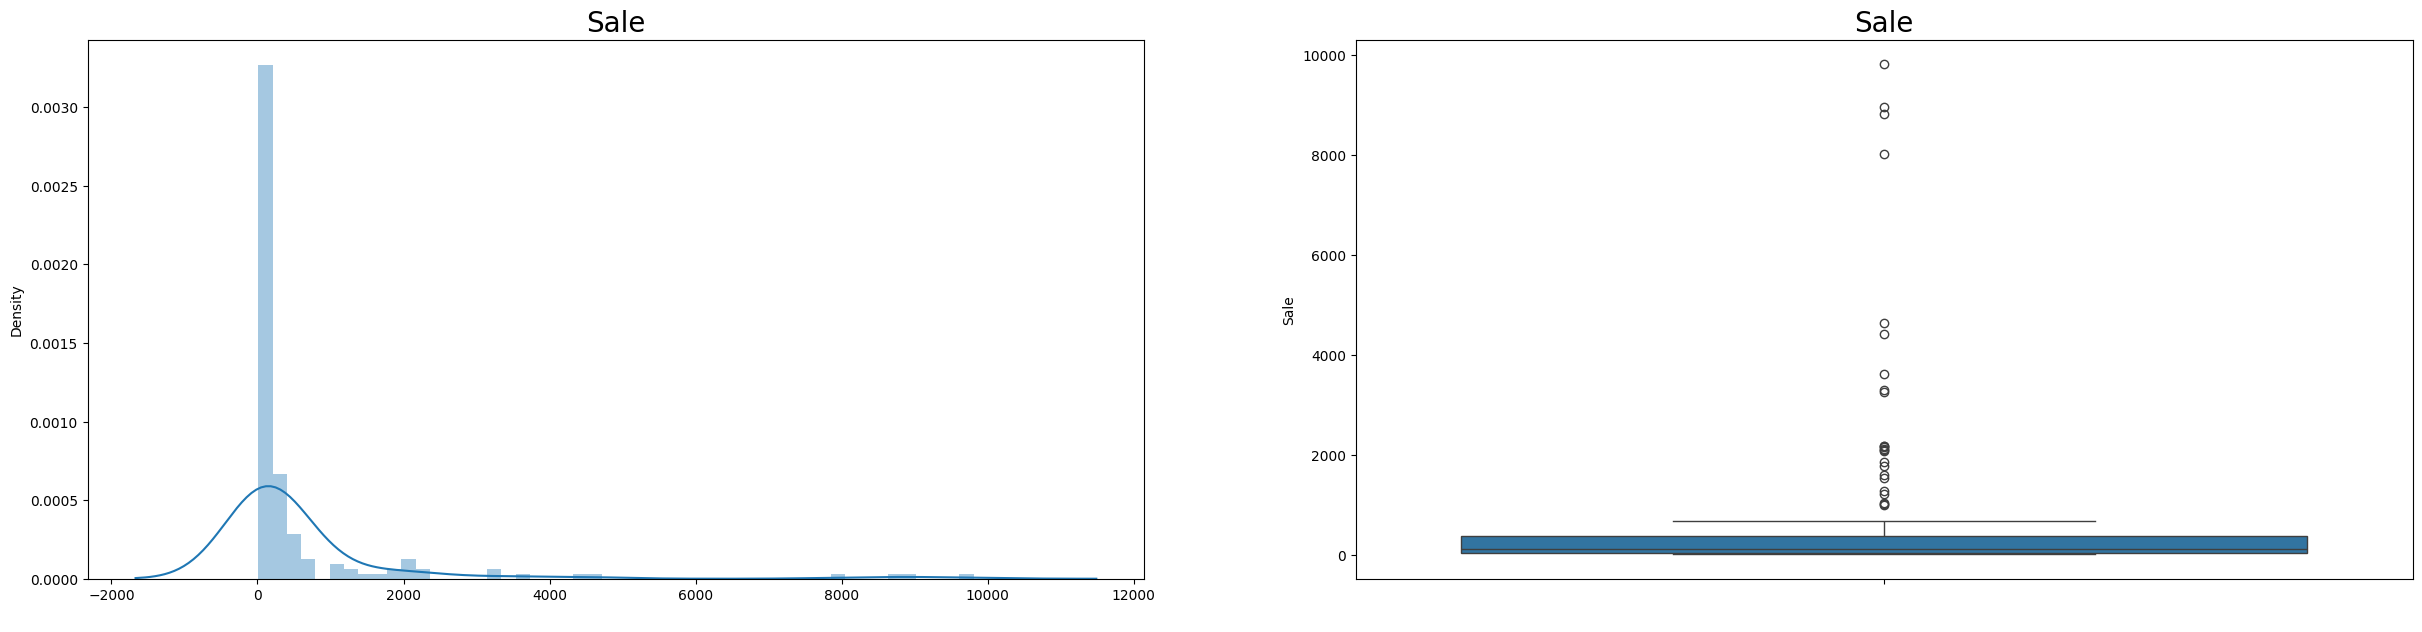

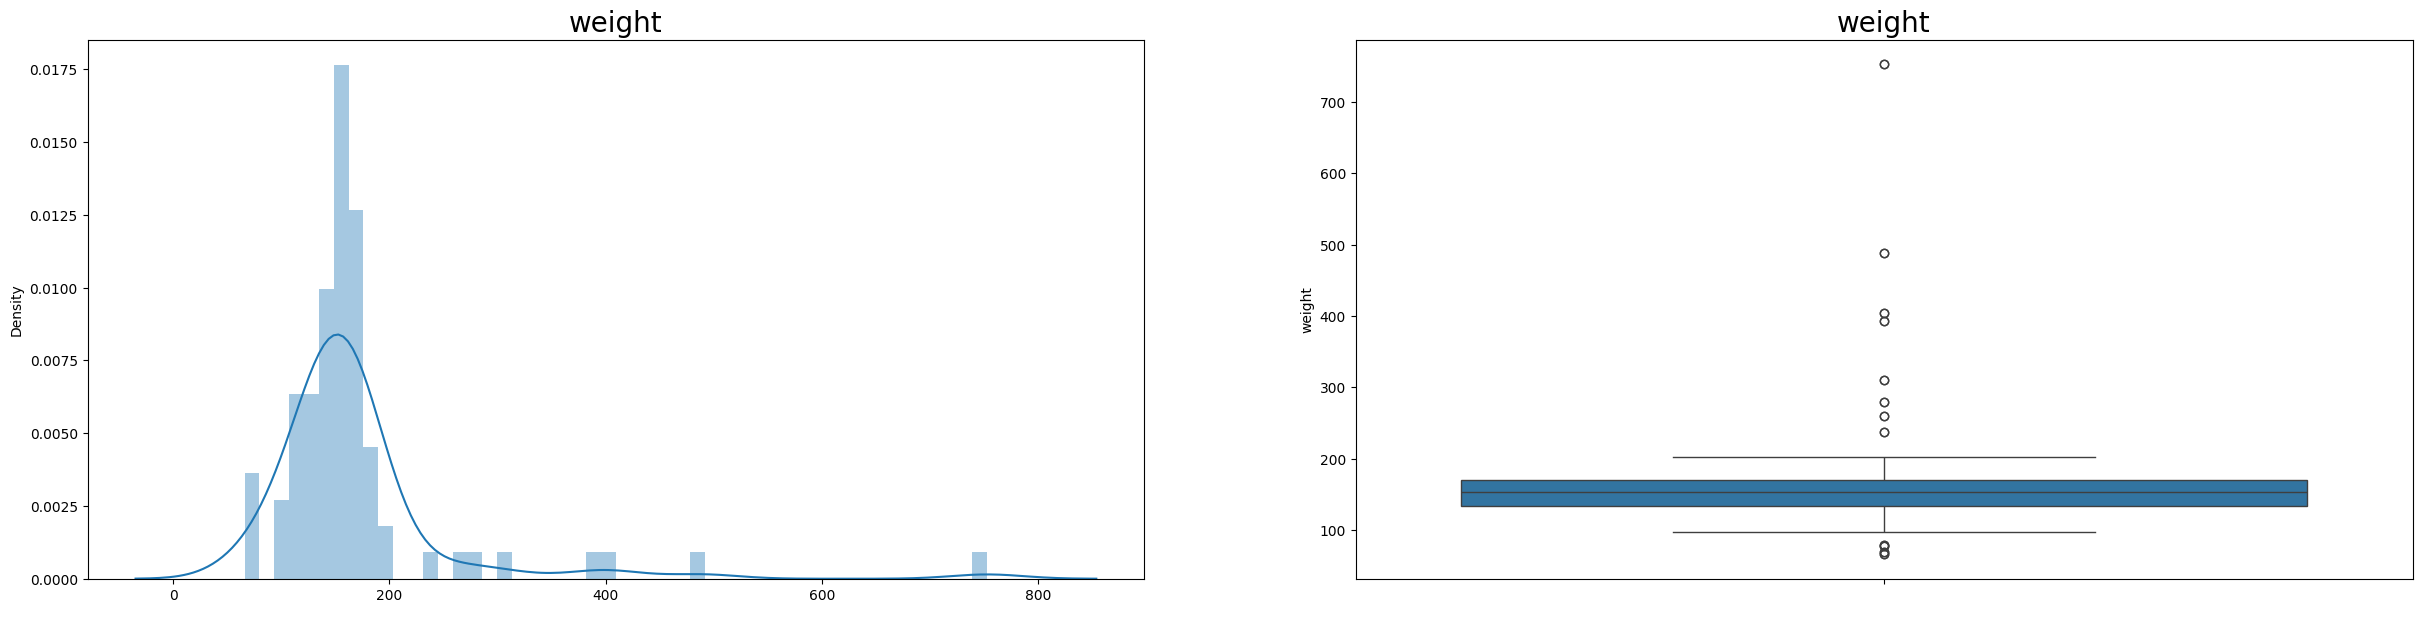

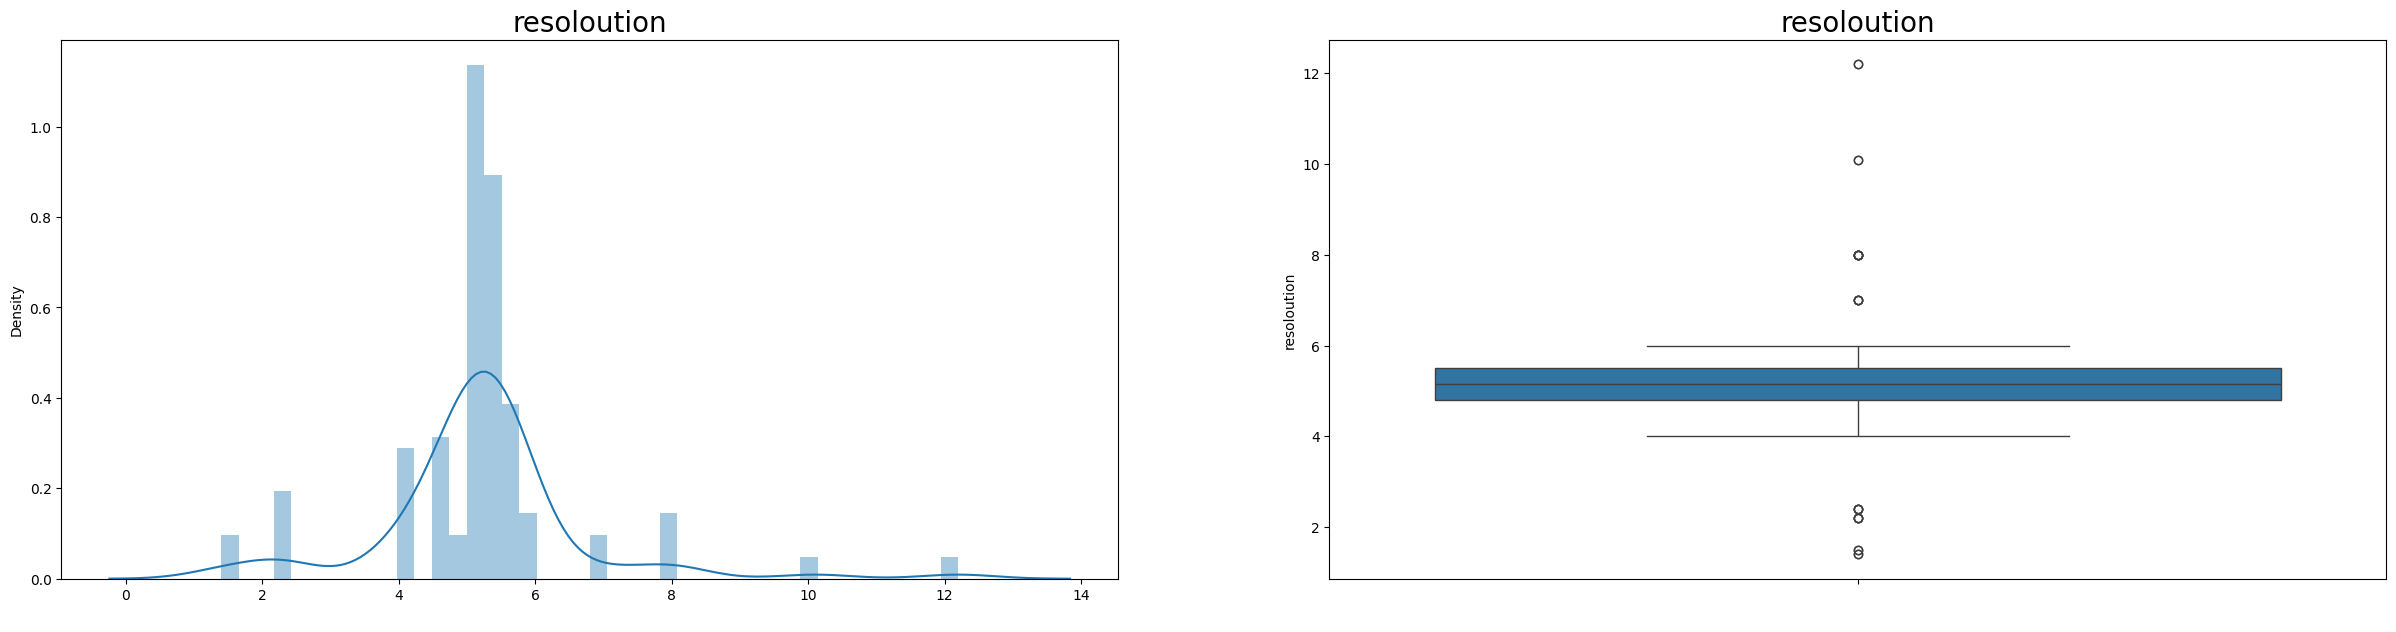

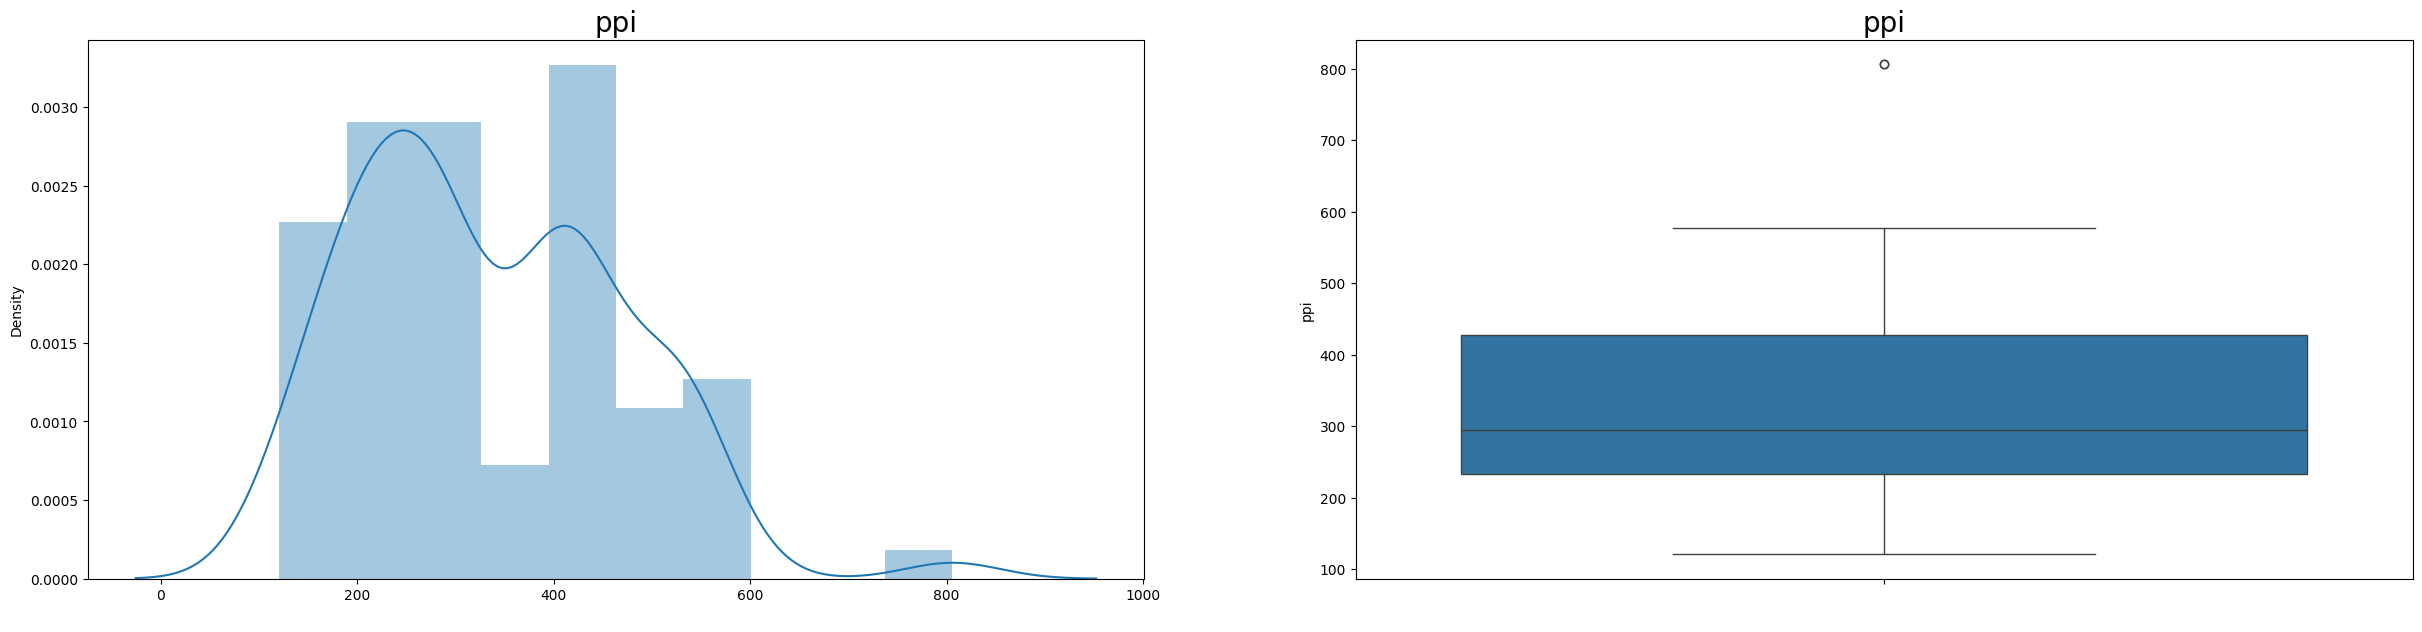

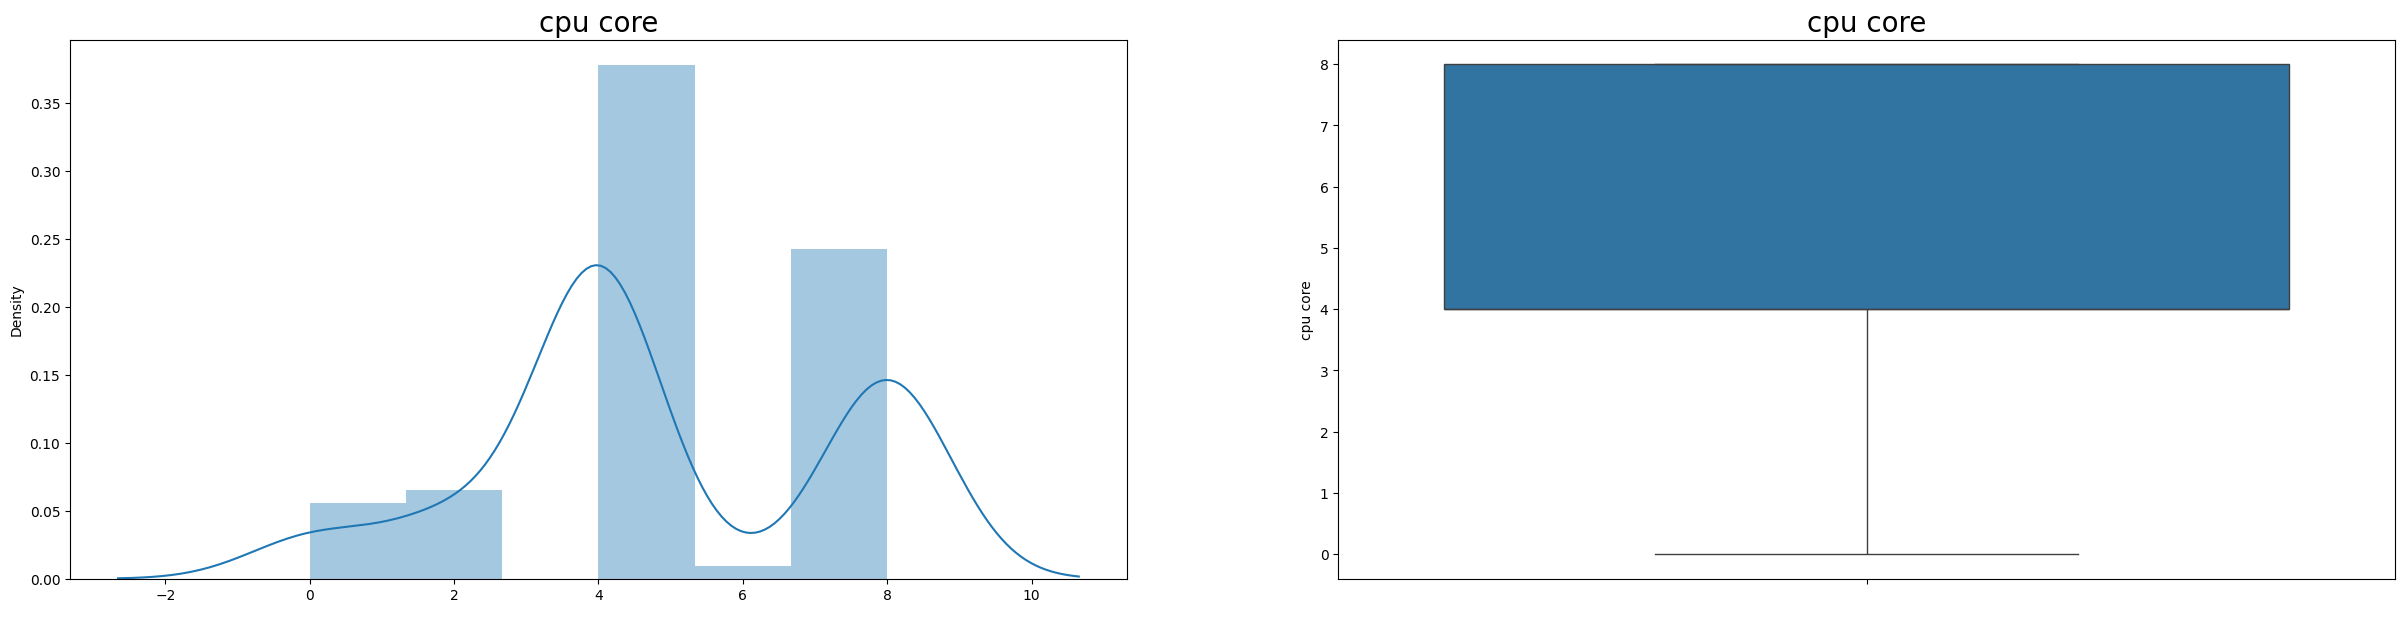

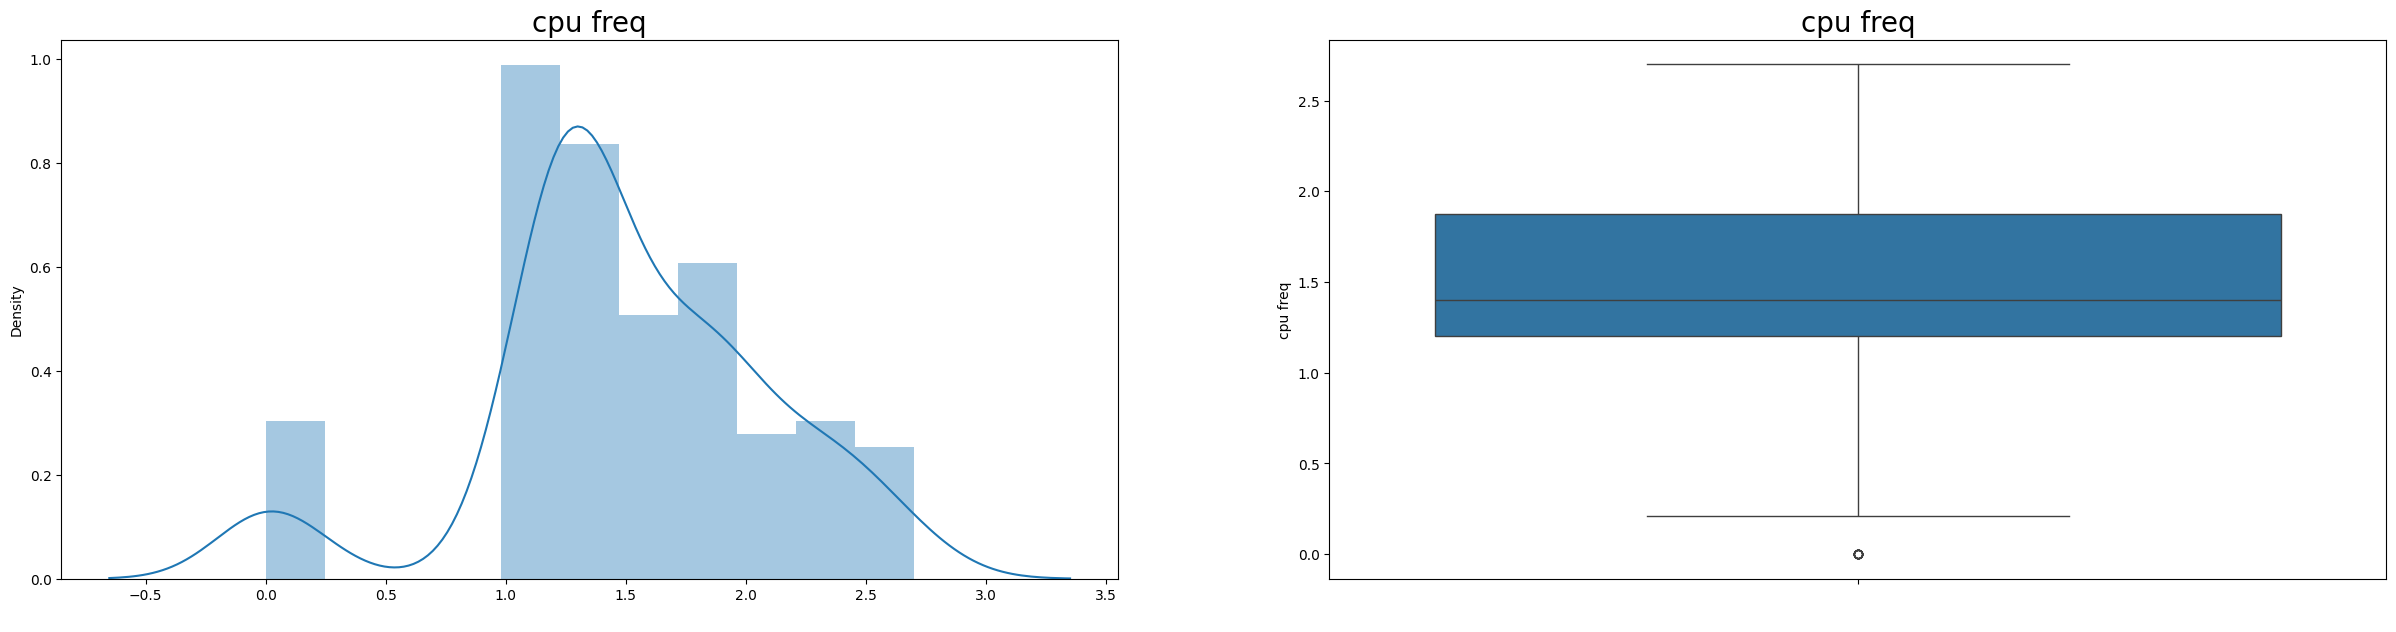

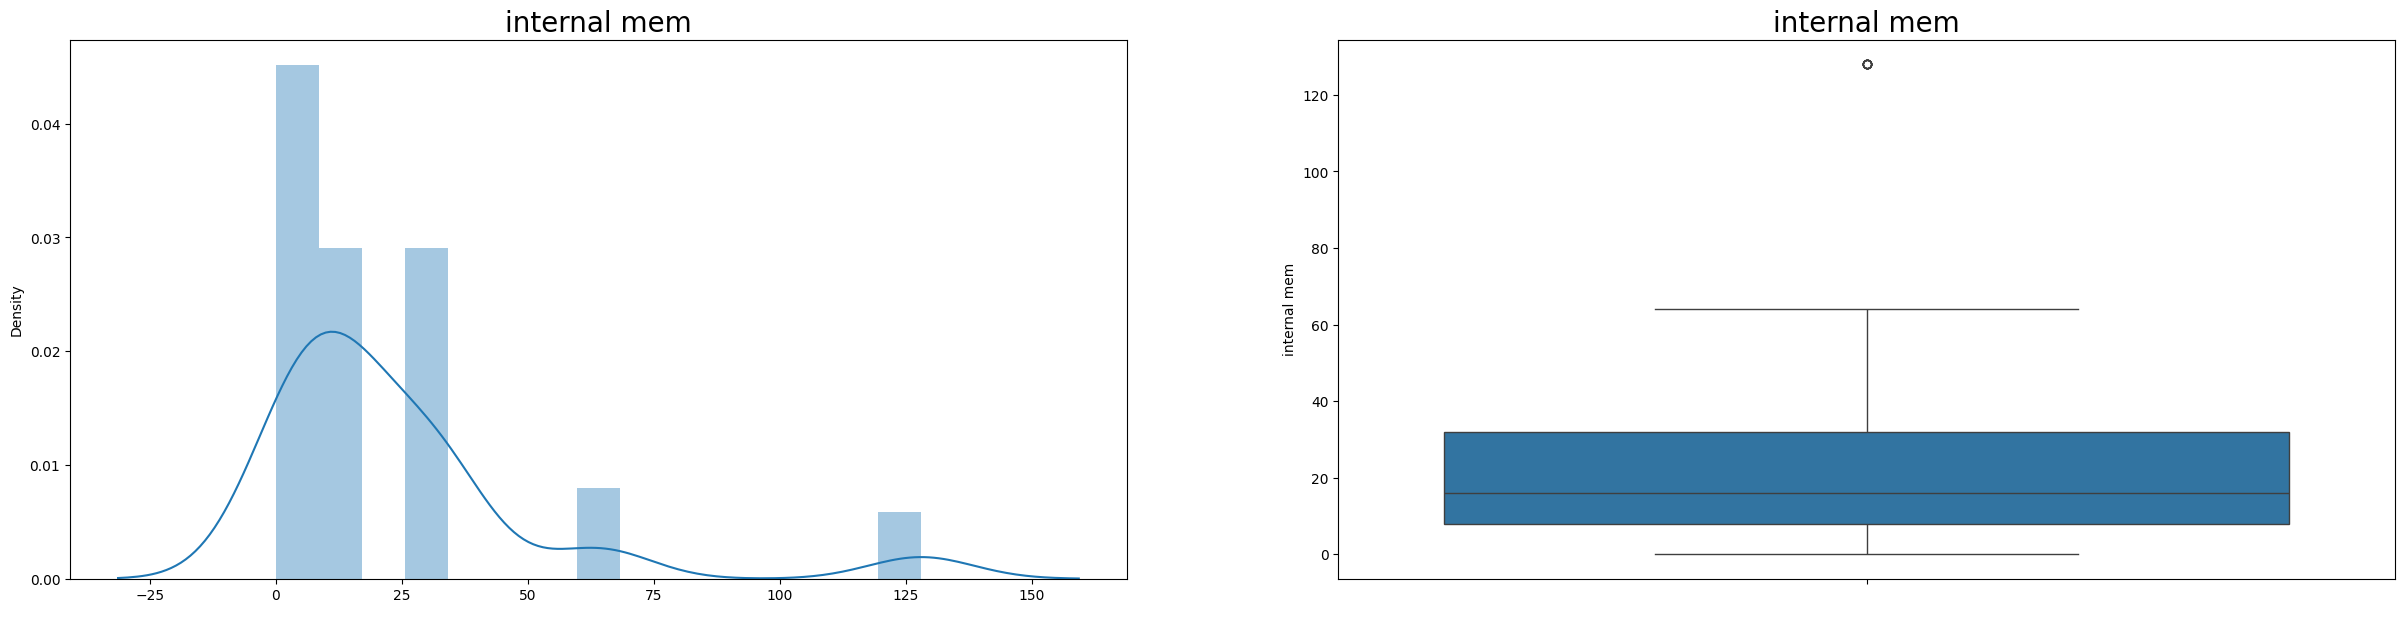

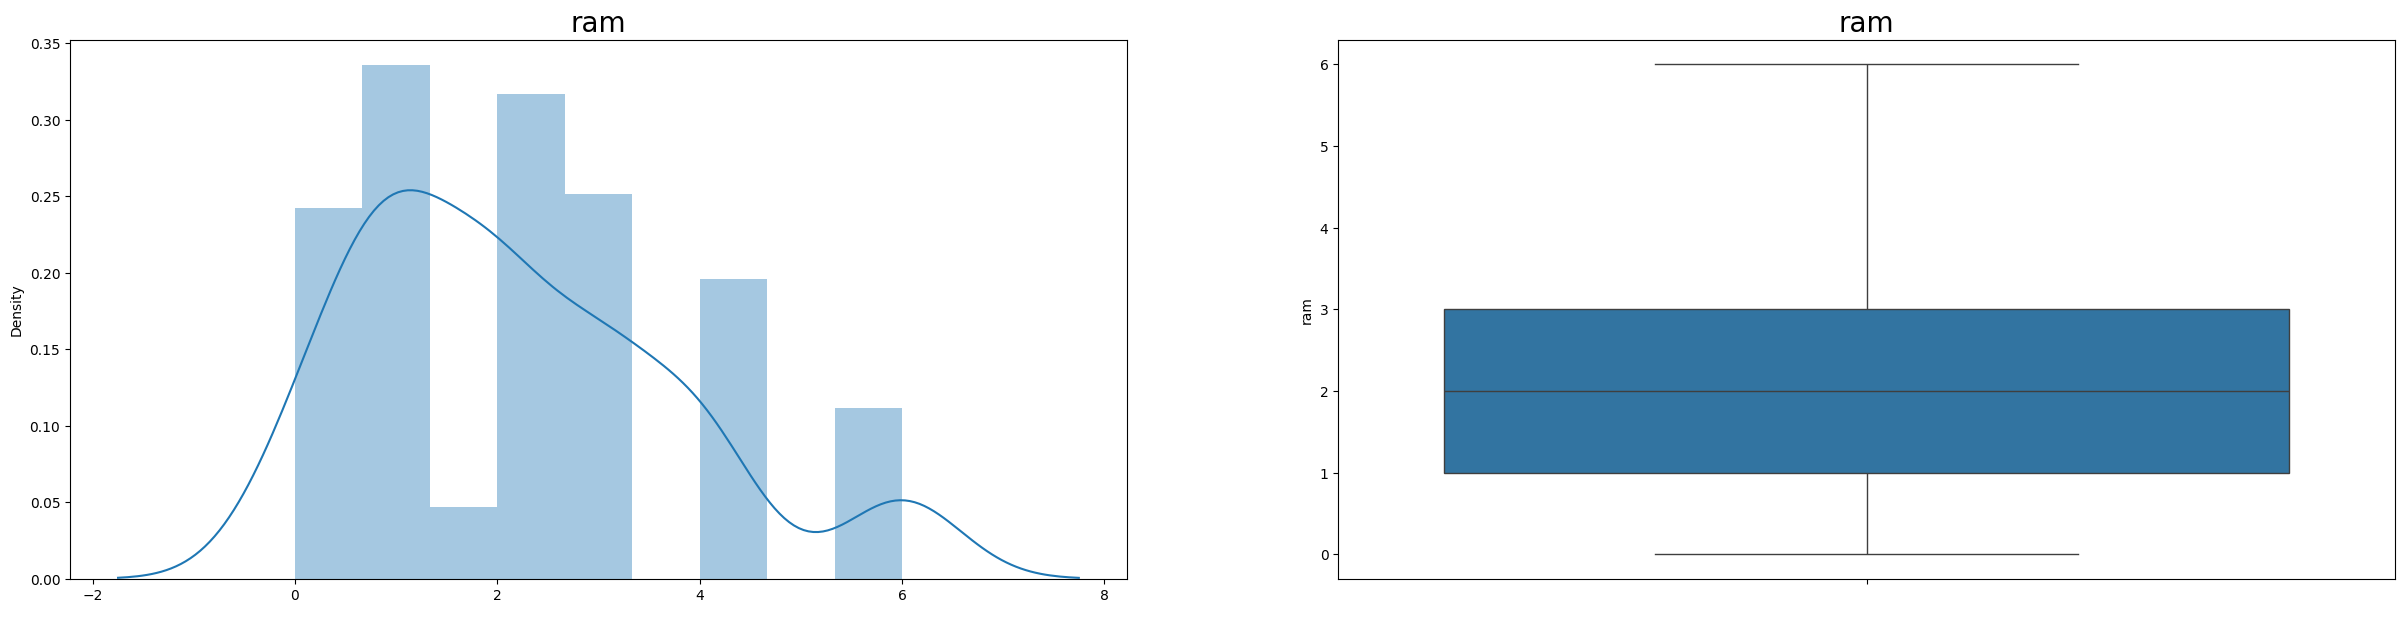

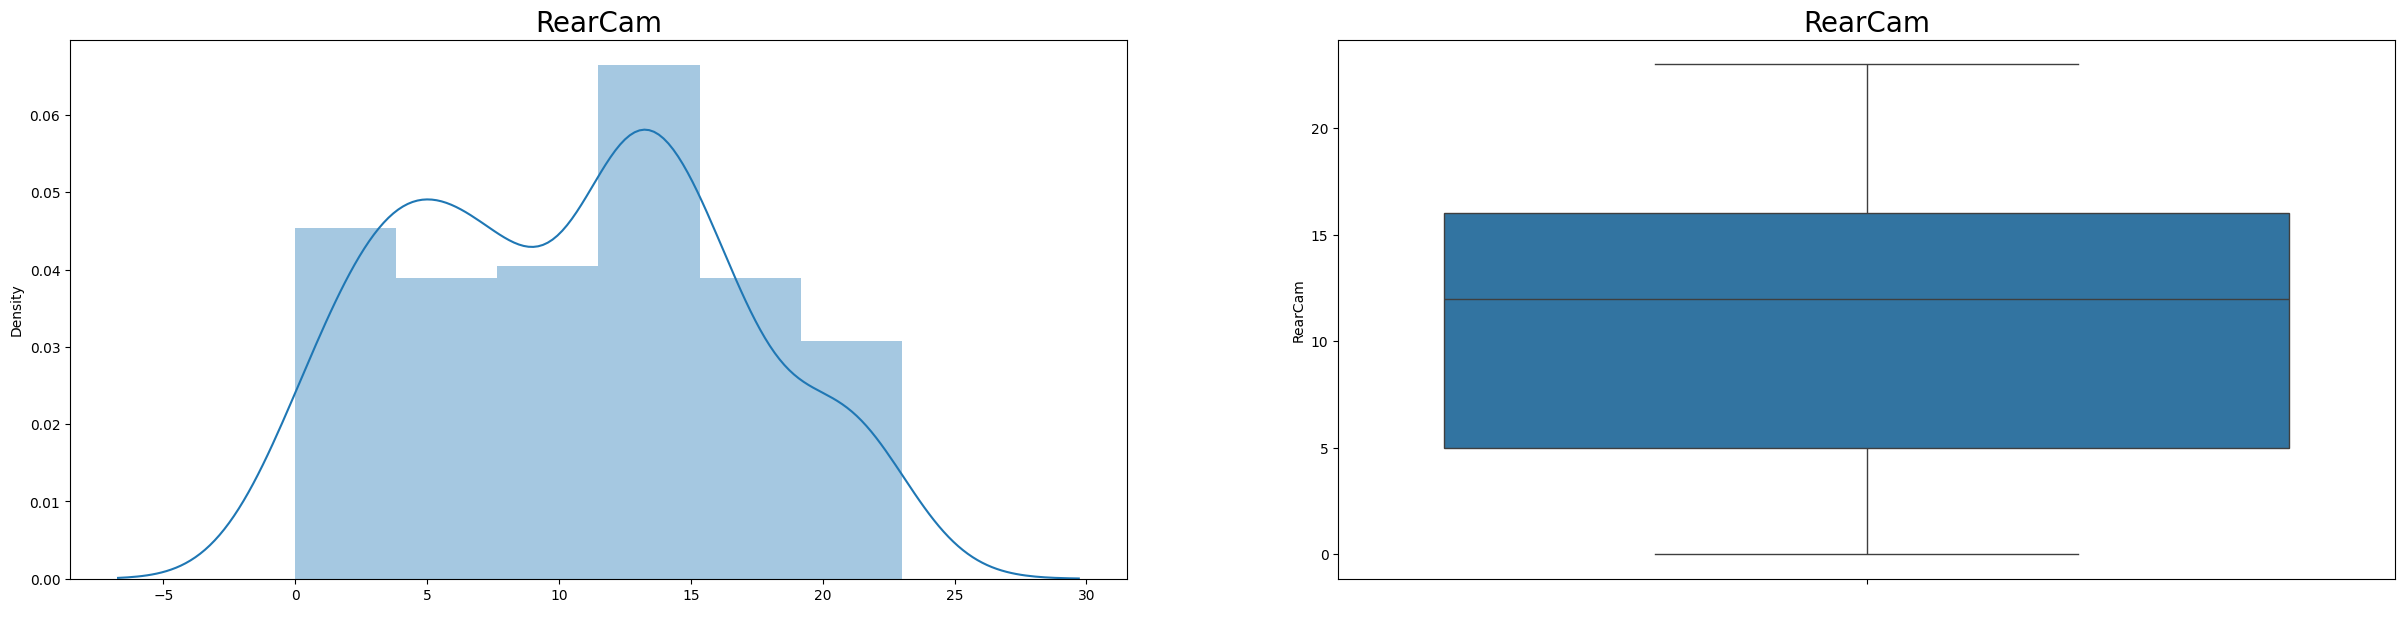

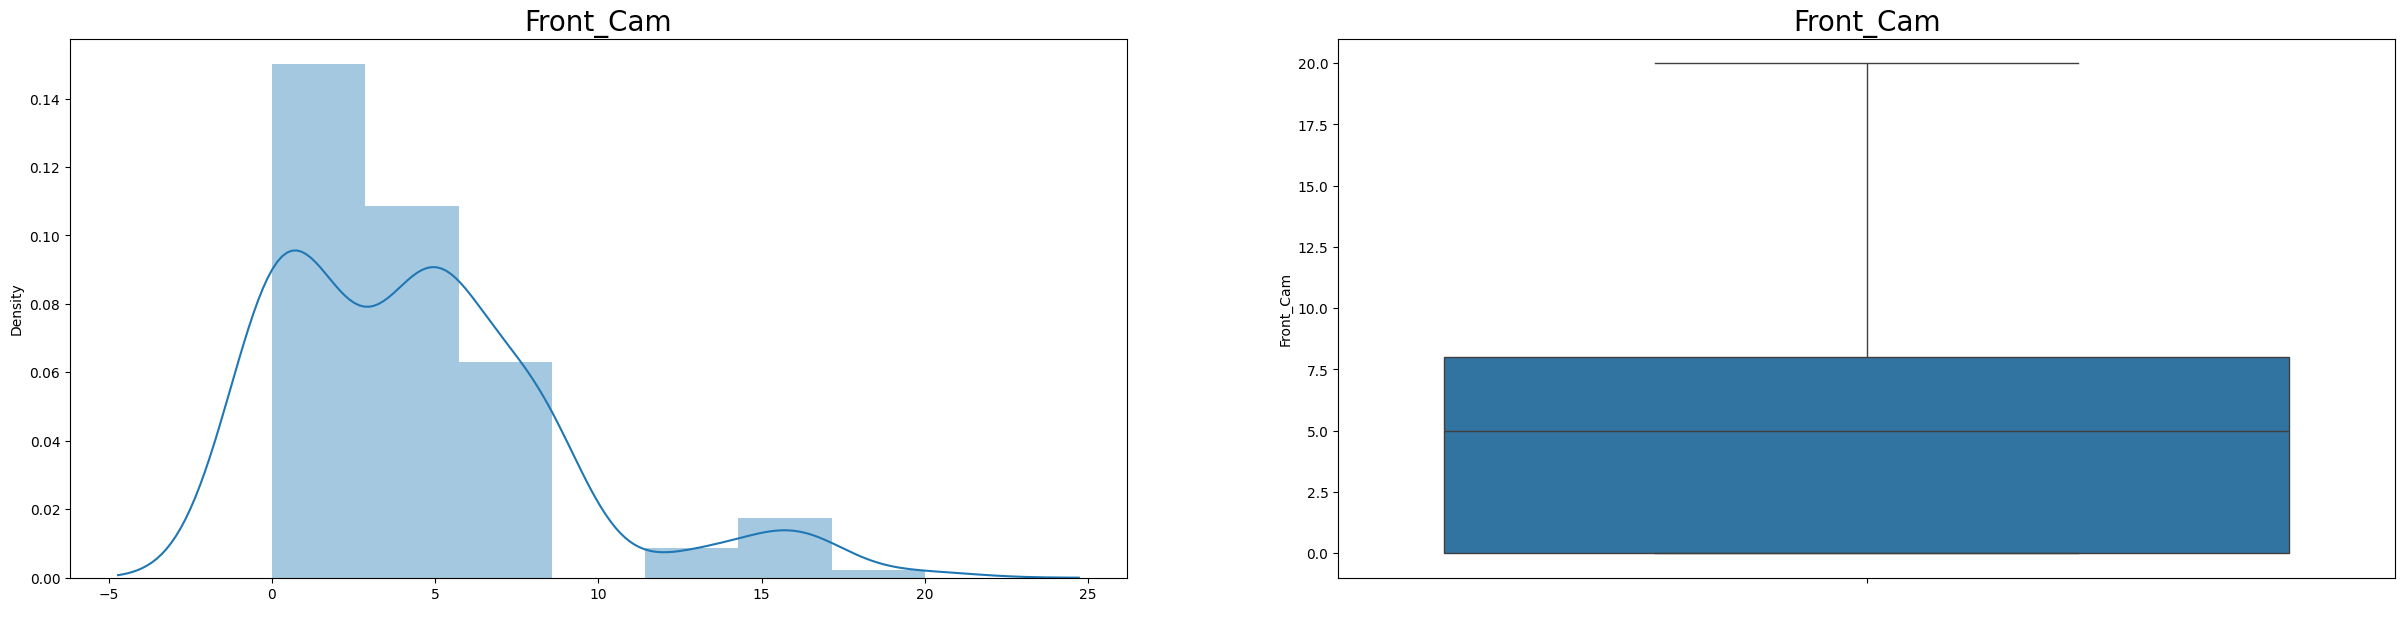

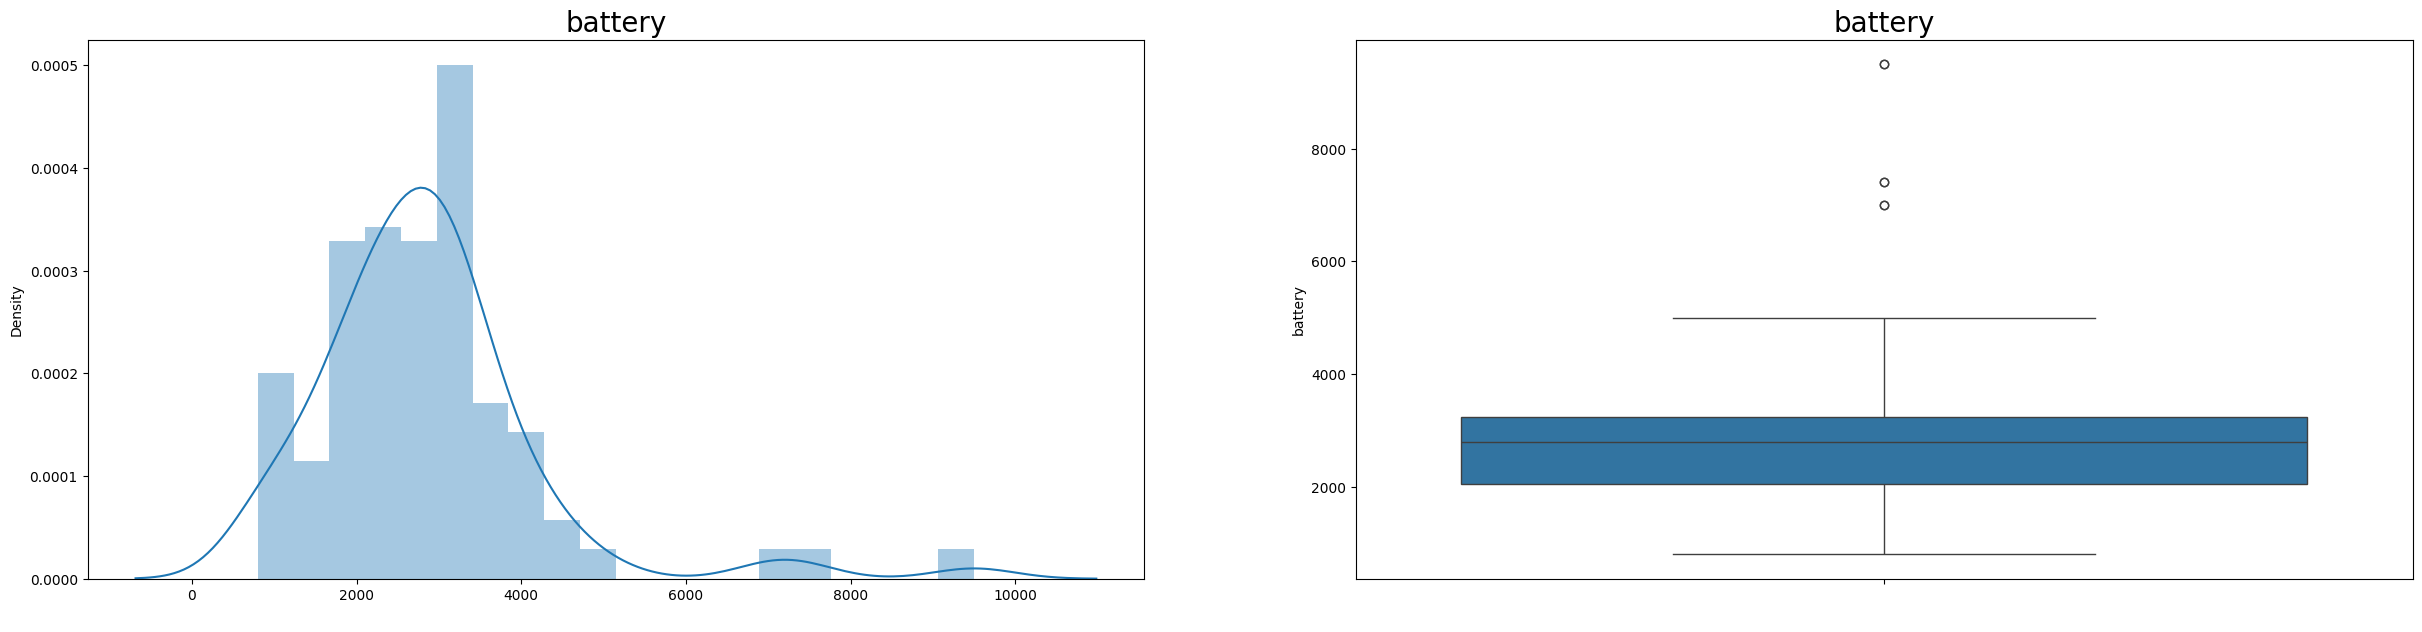

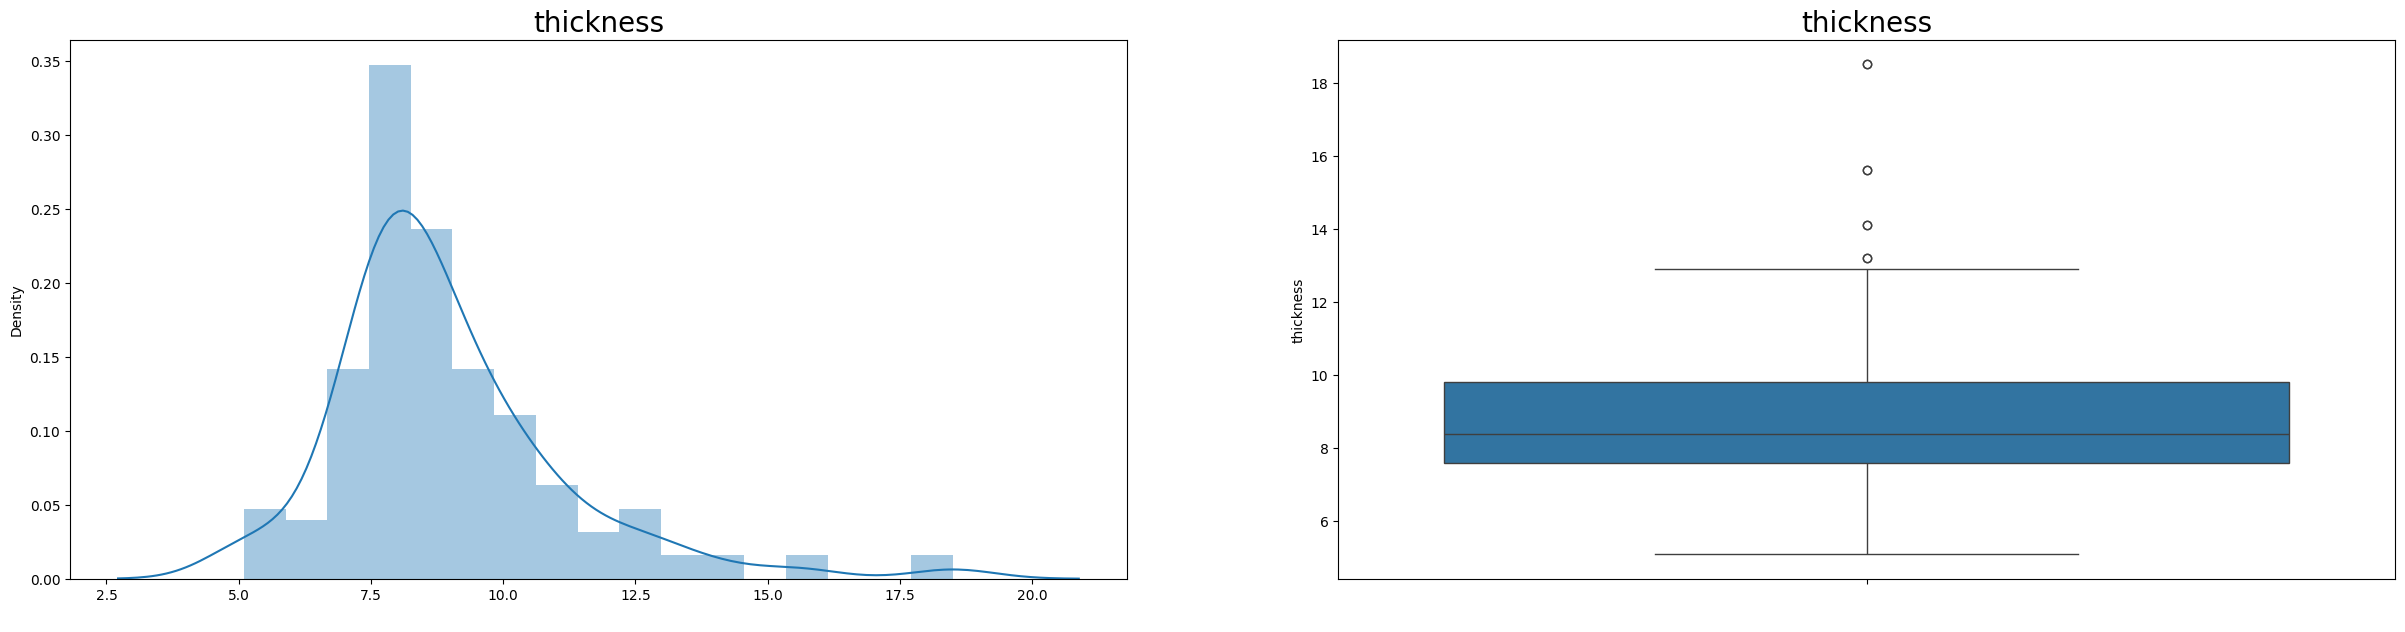

In [7]:
data1_columns = data1.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(data1[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = data1[col])
    plt.title(col, size = 20)
    plt.show()

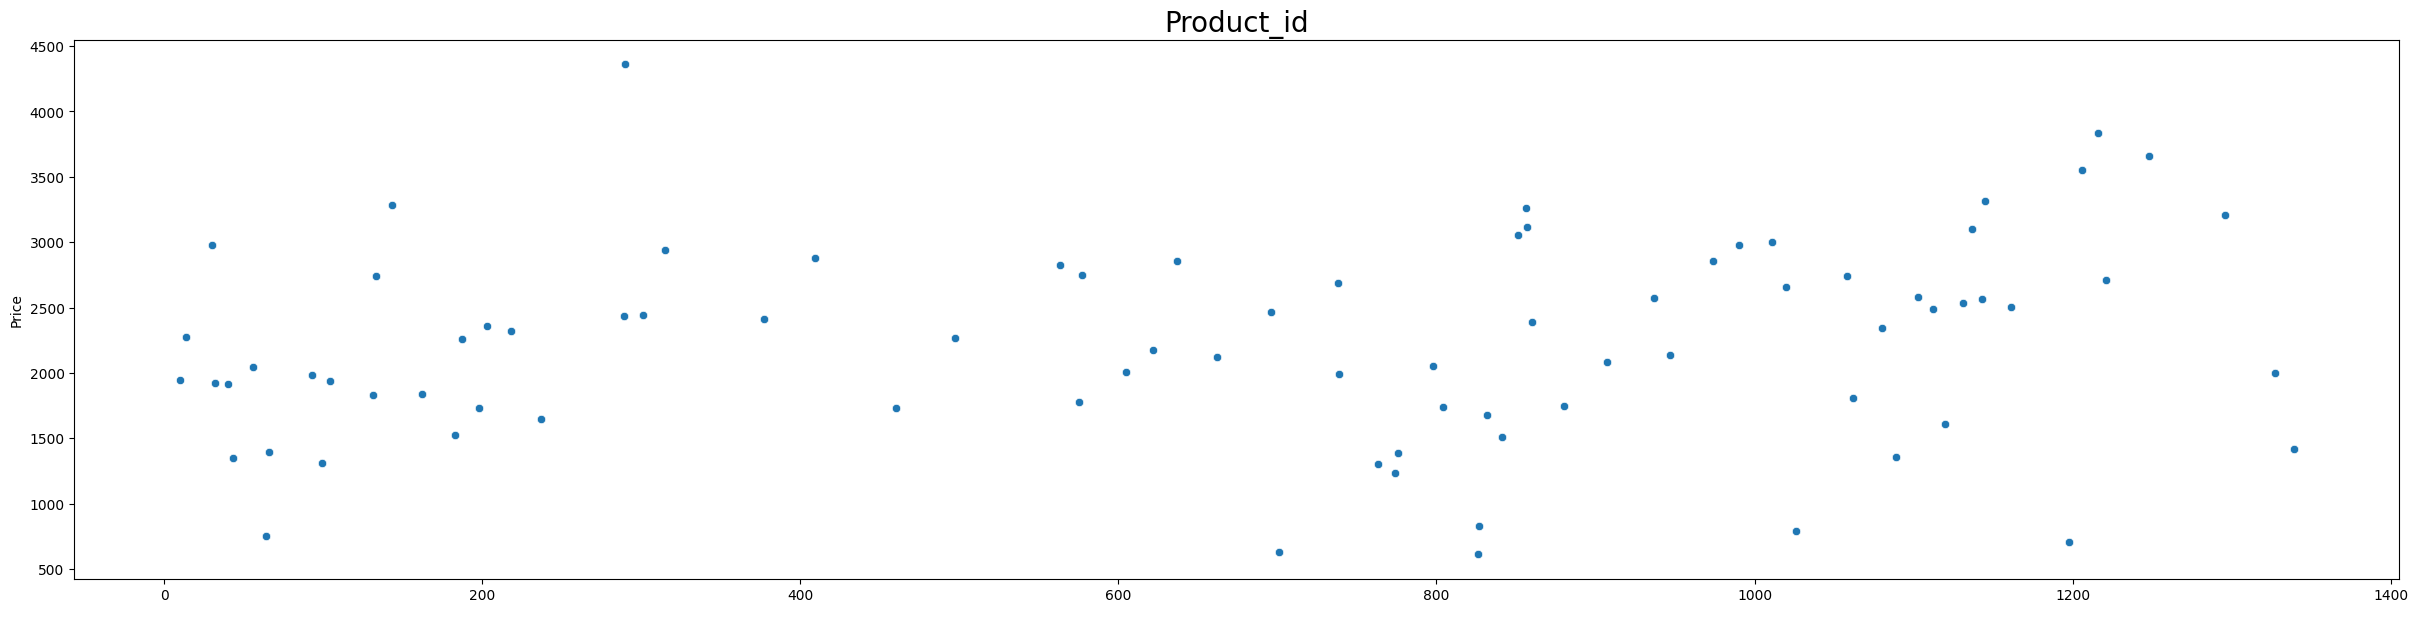

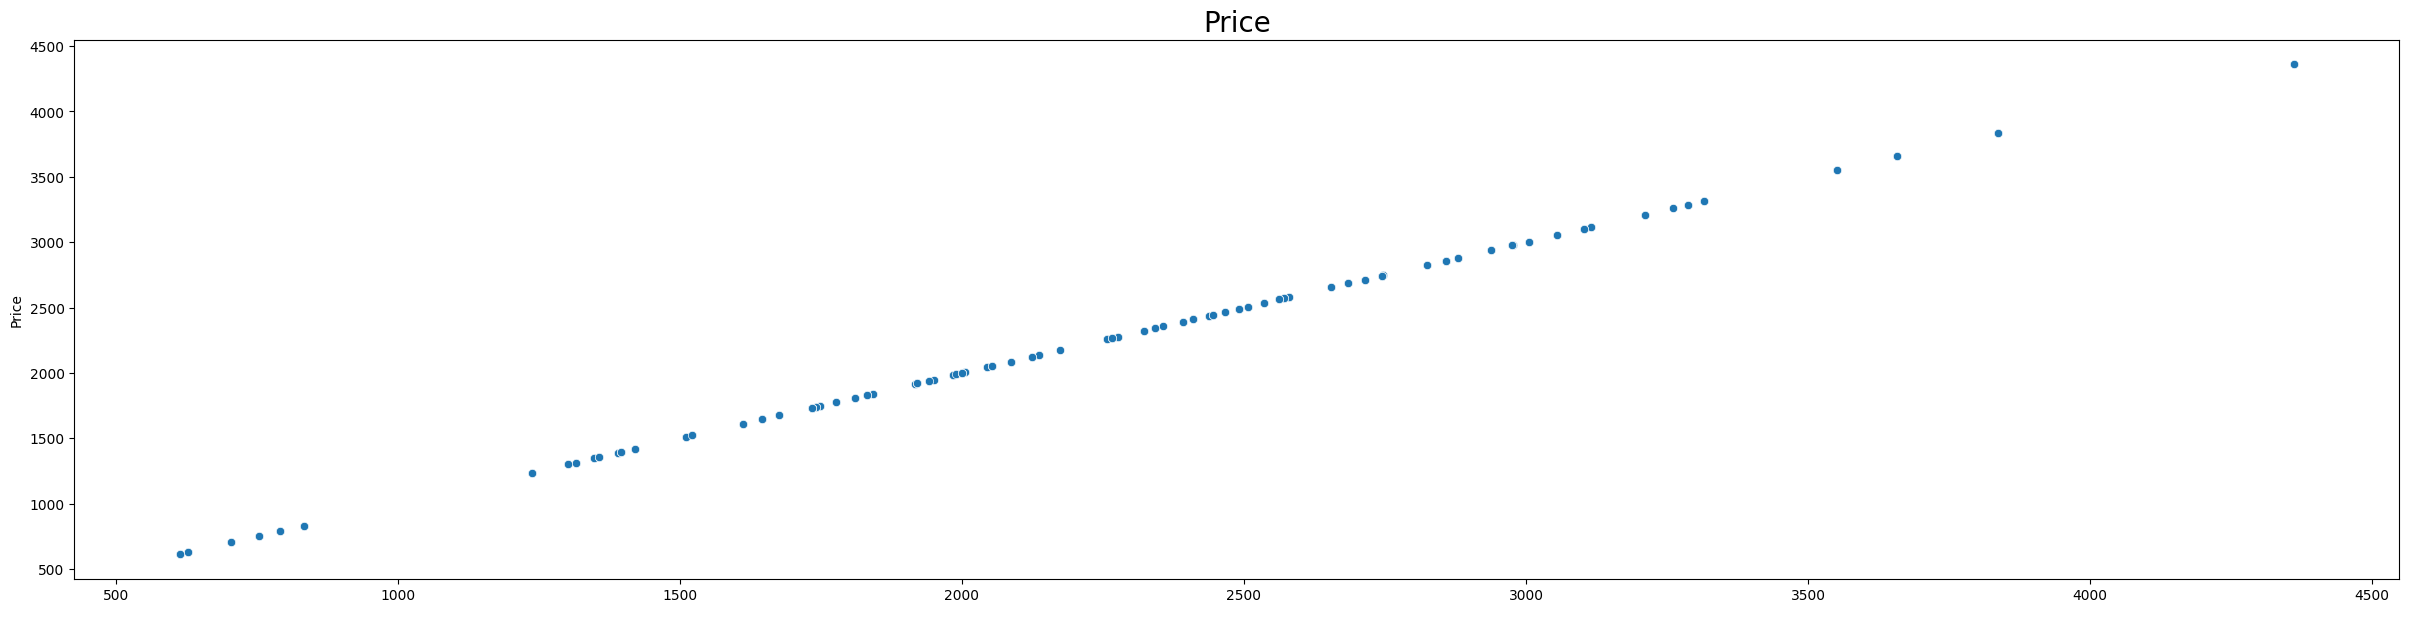

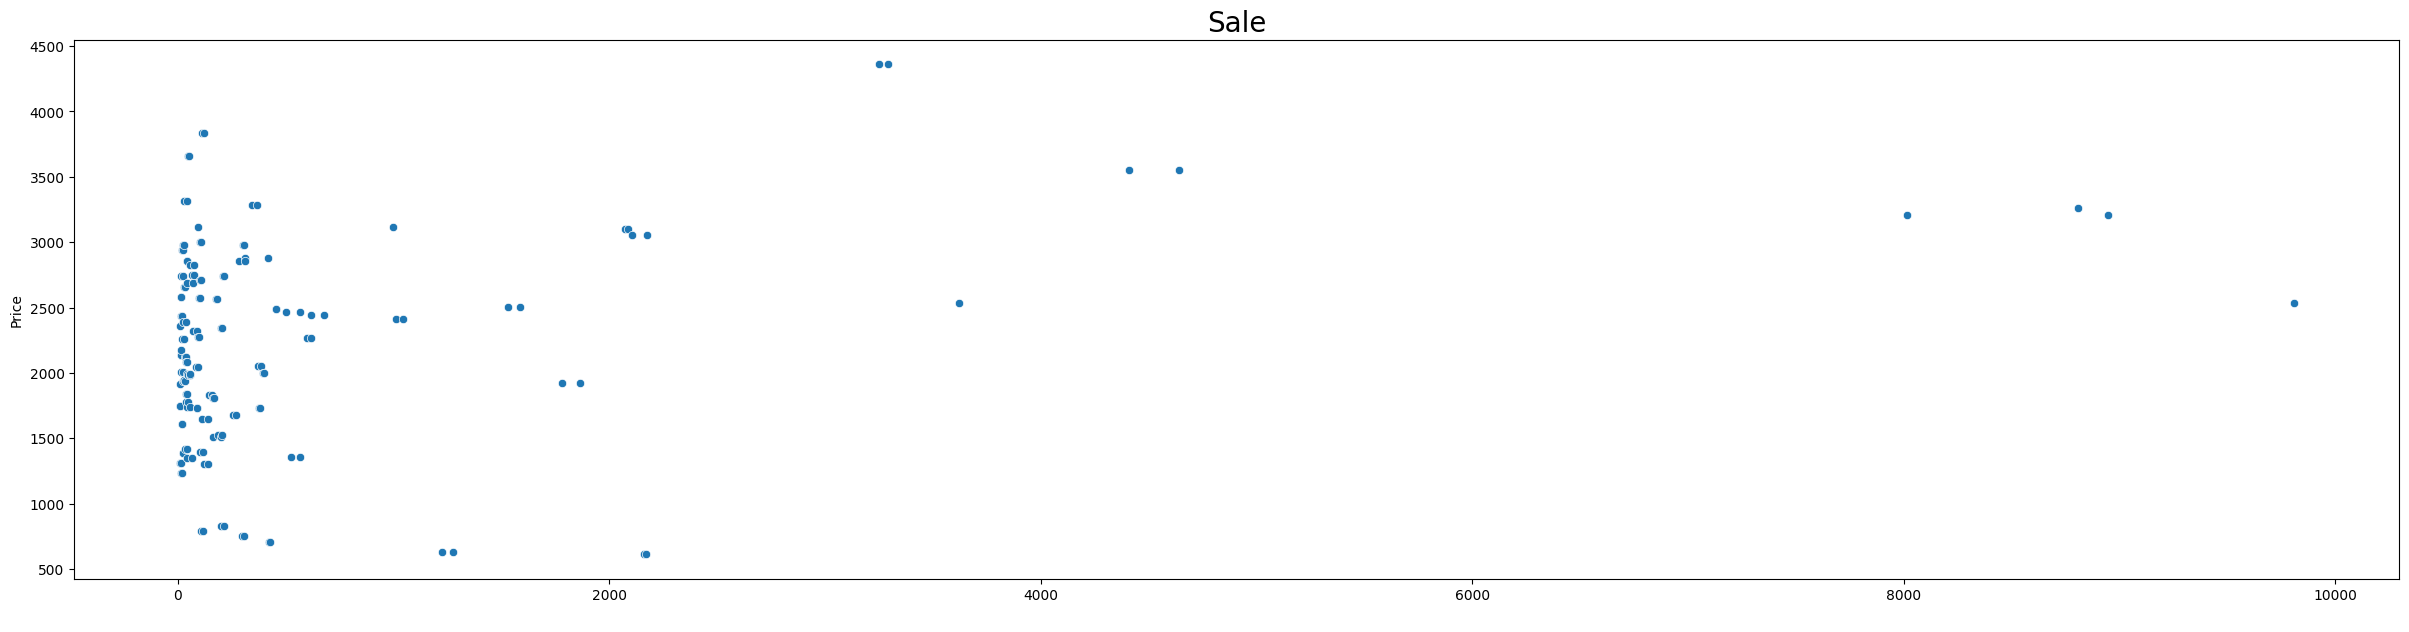

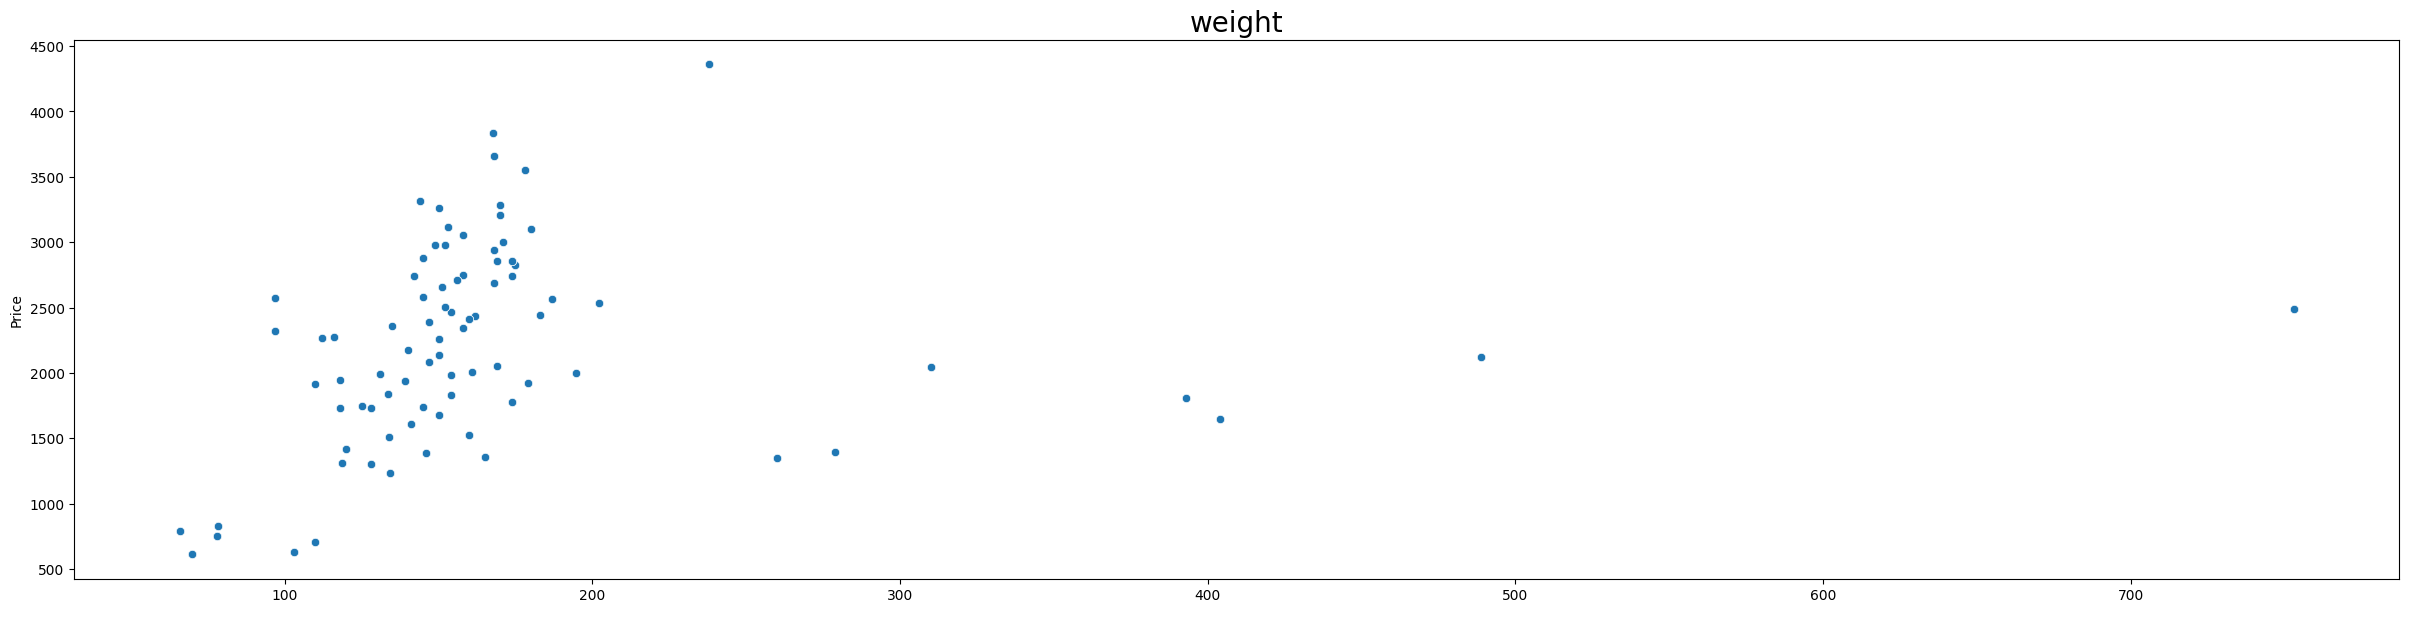

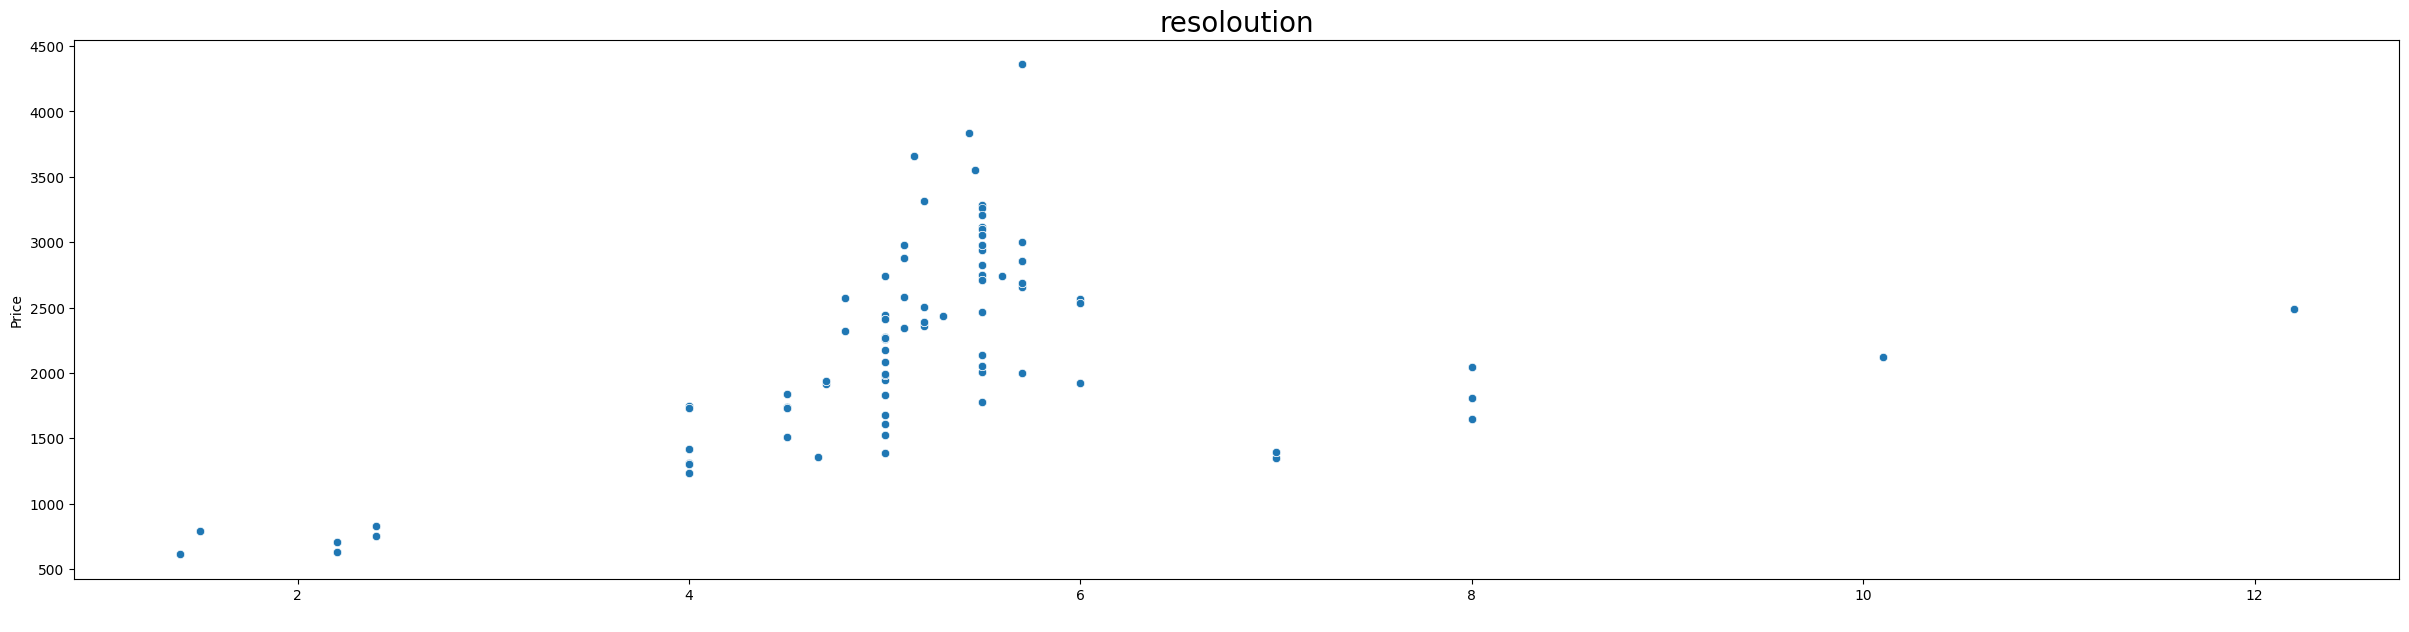

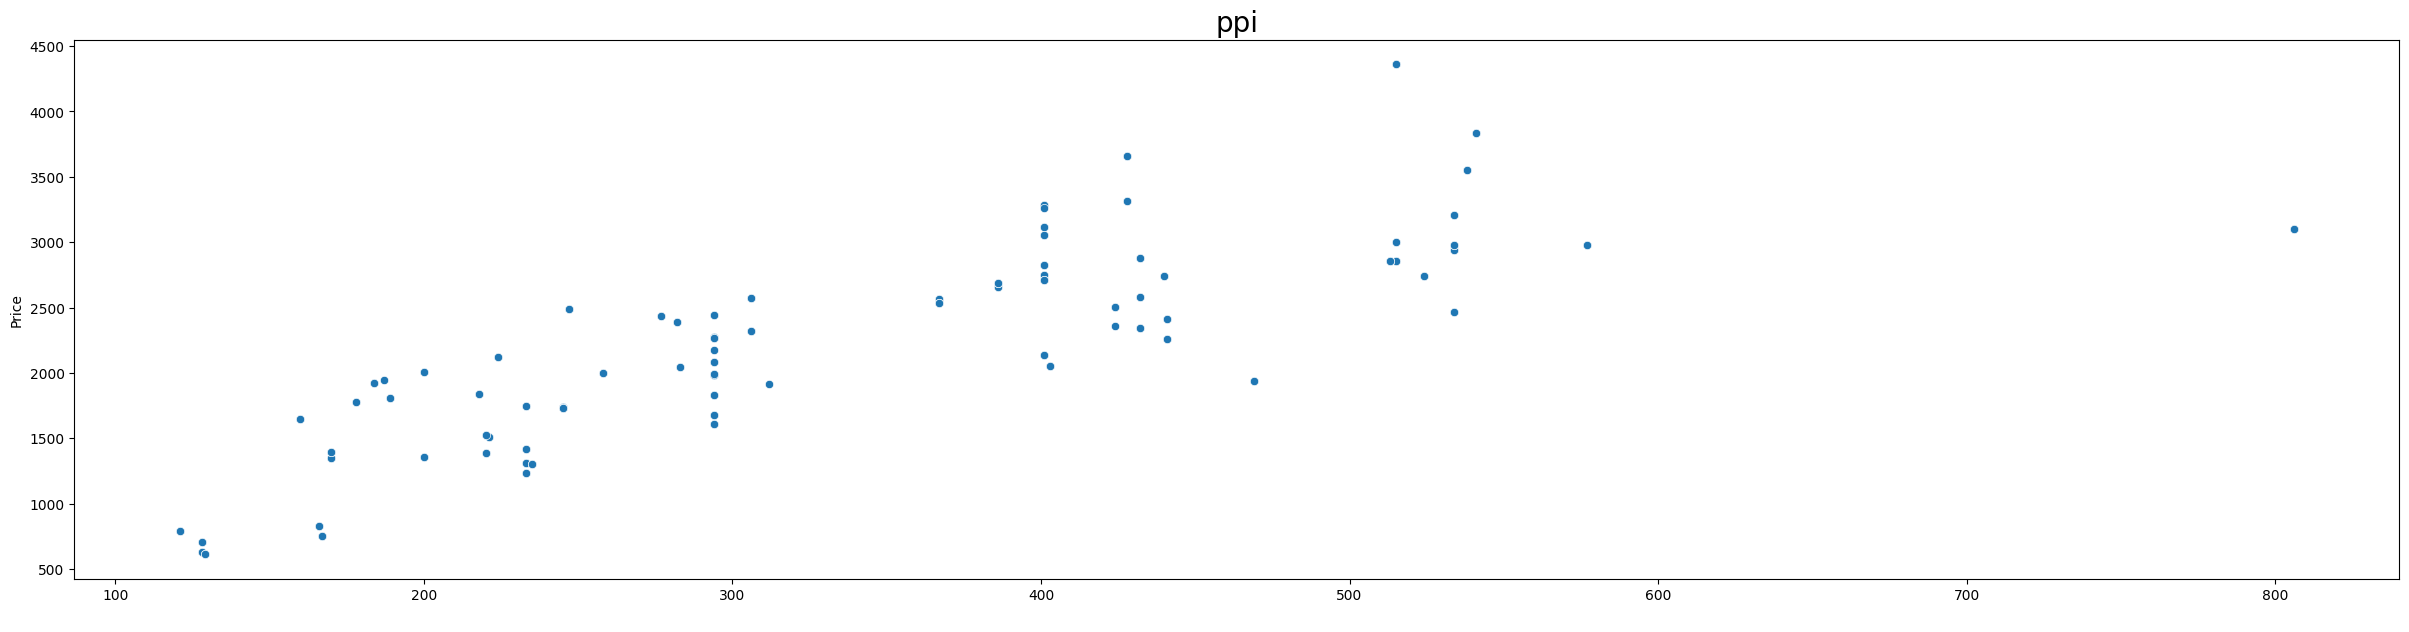

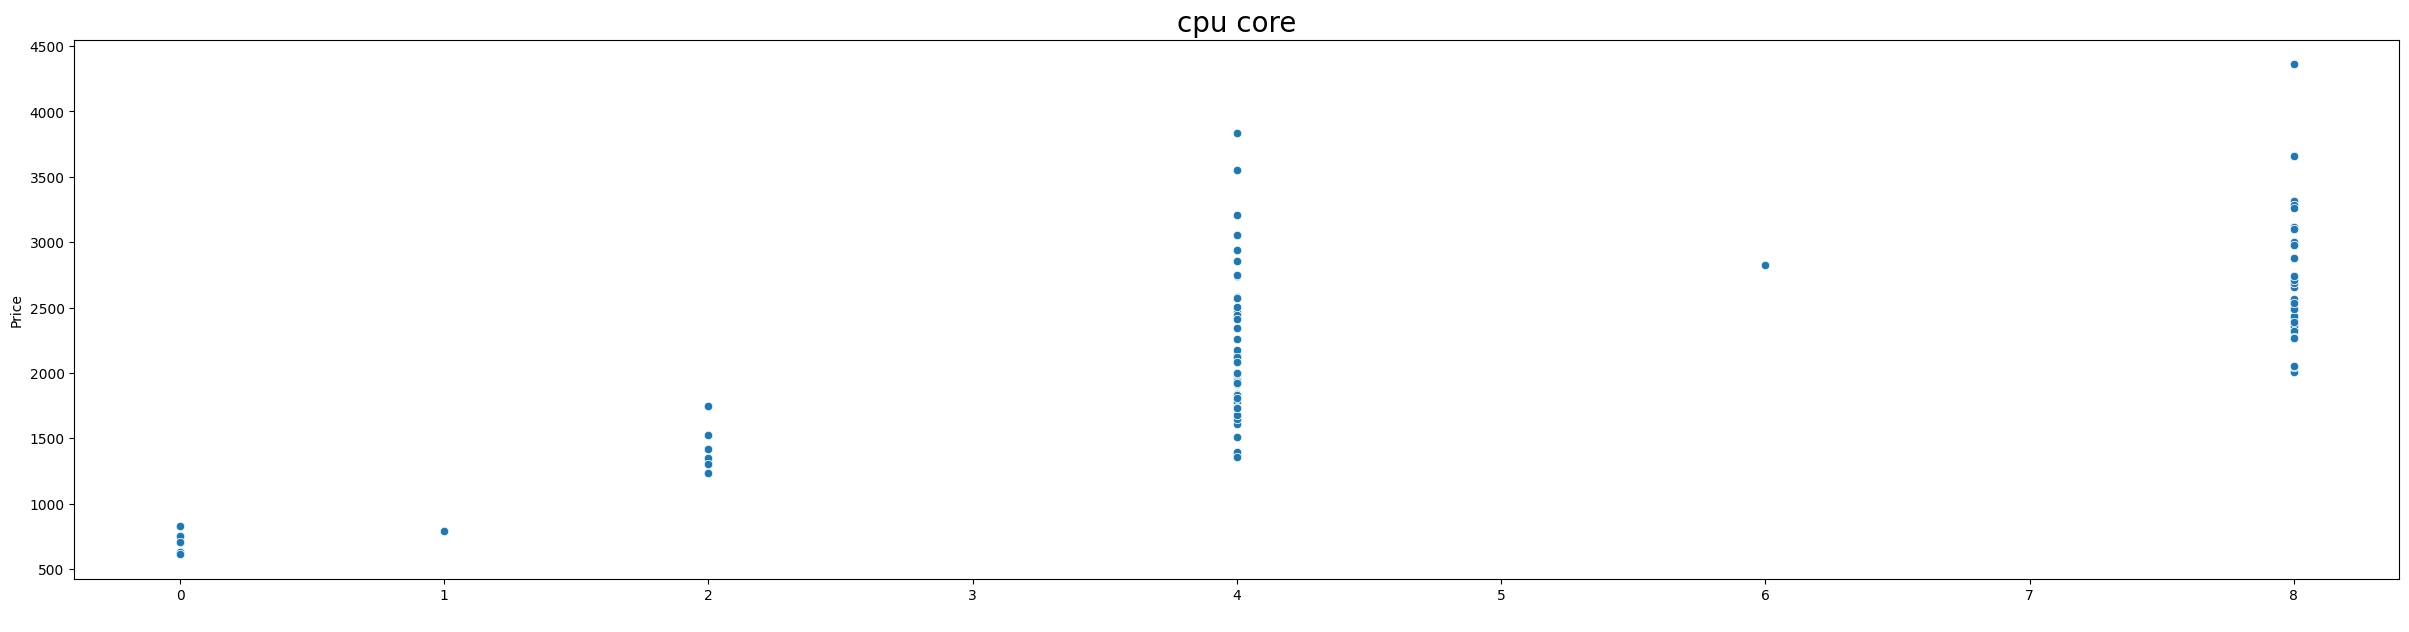

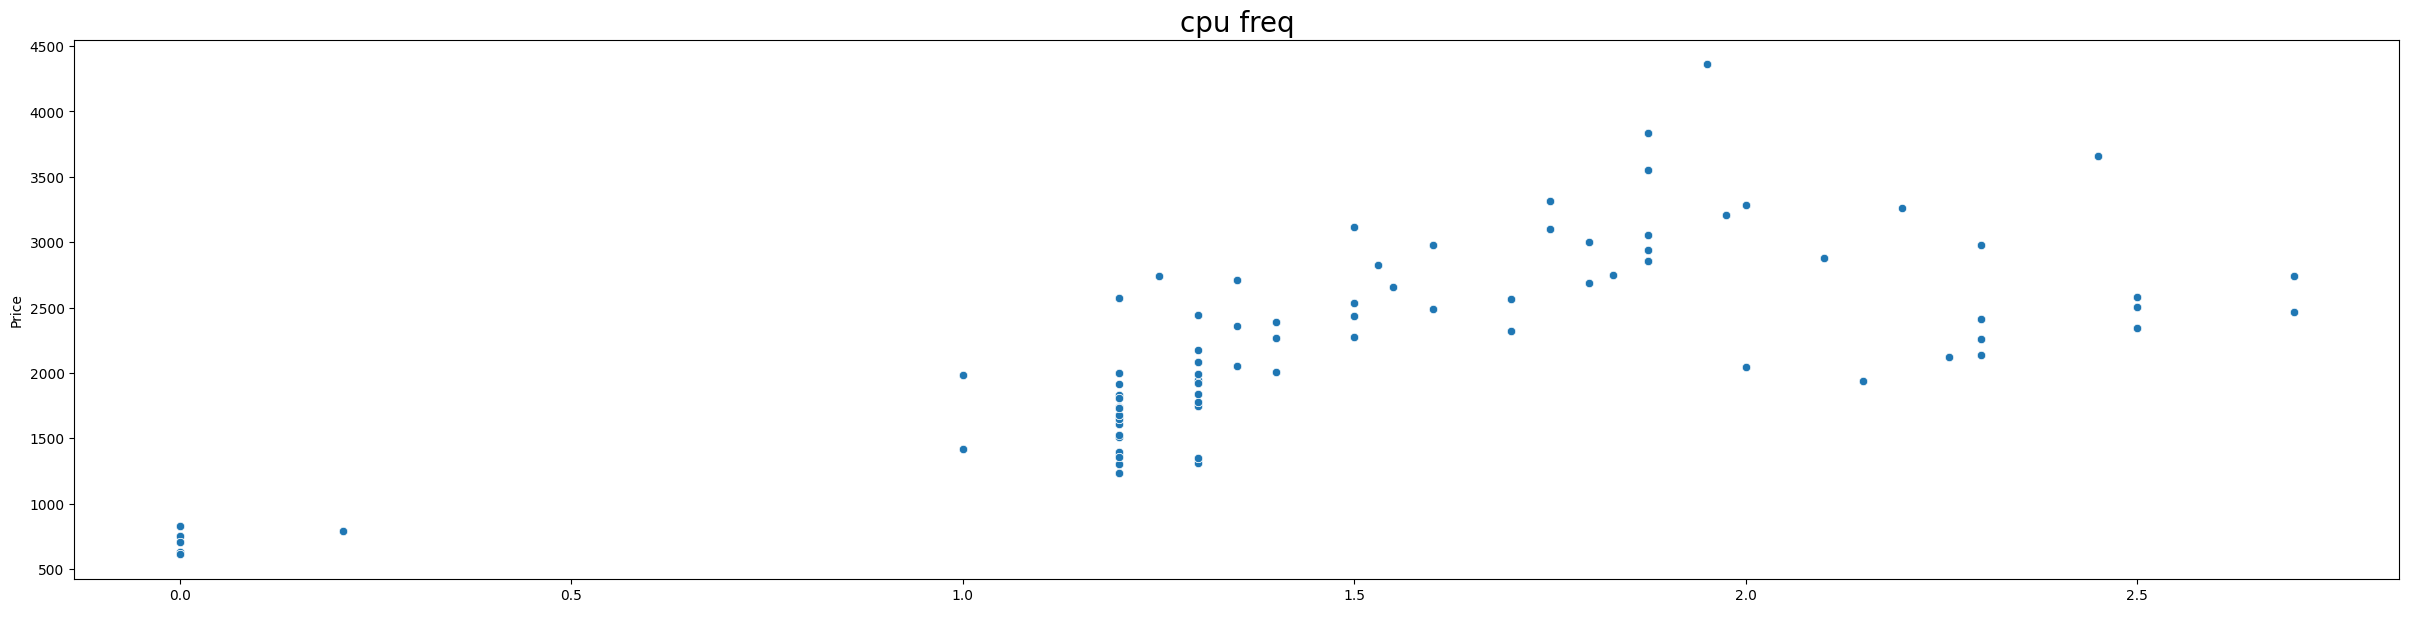

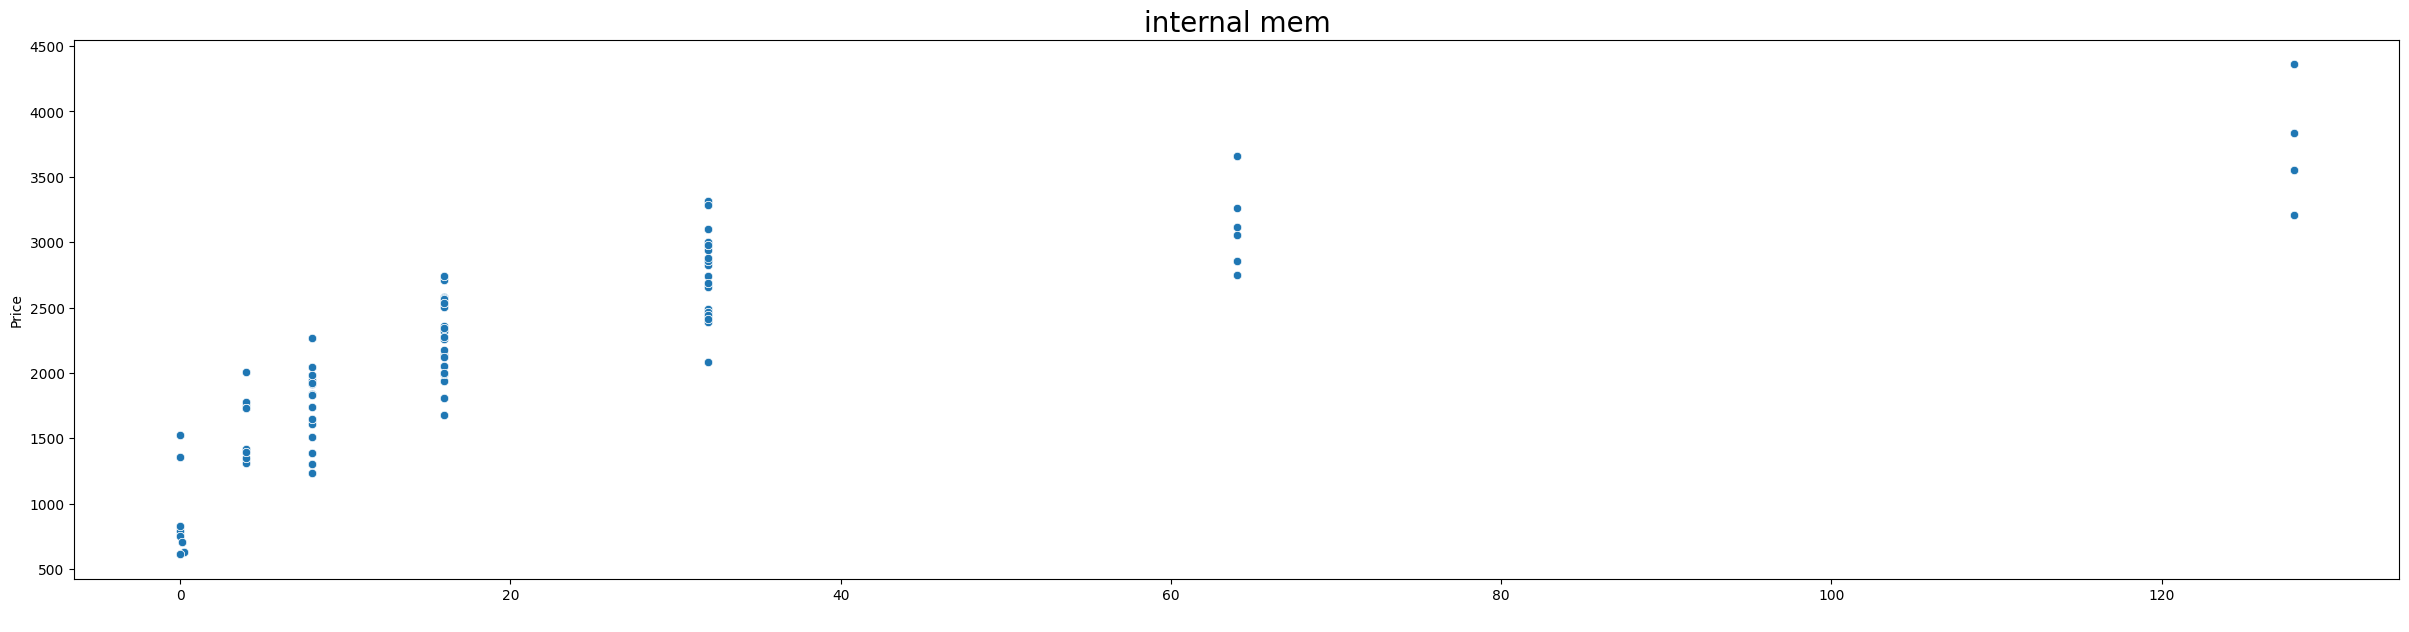

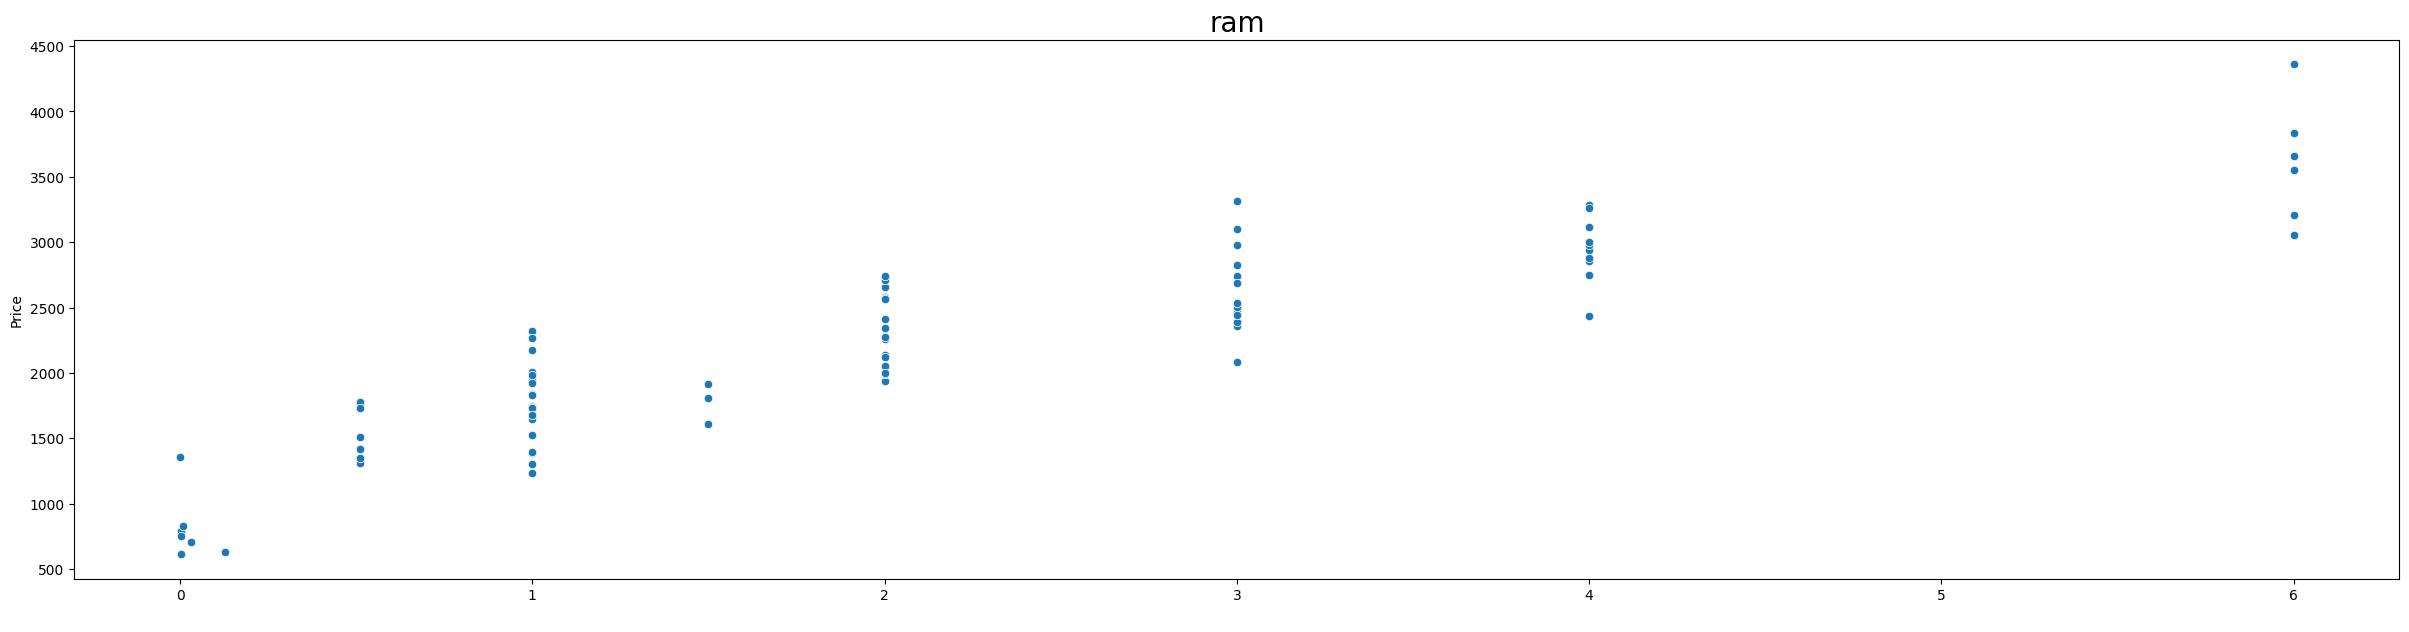

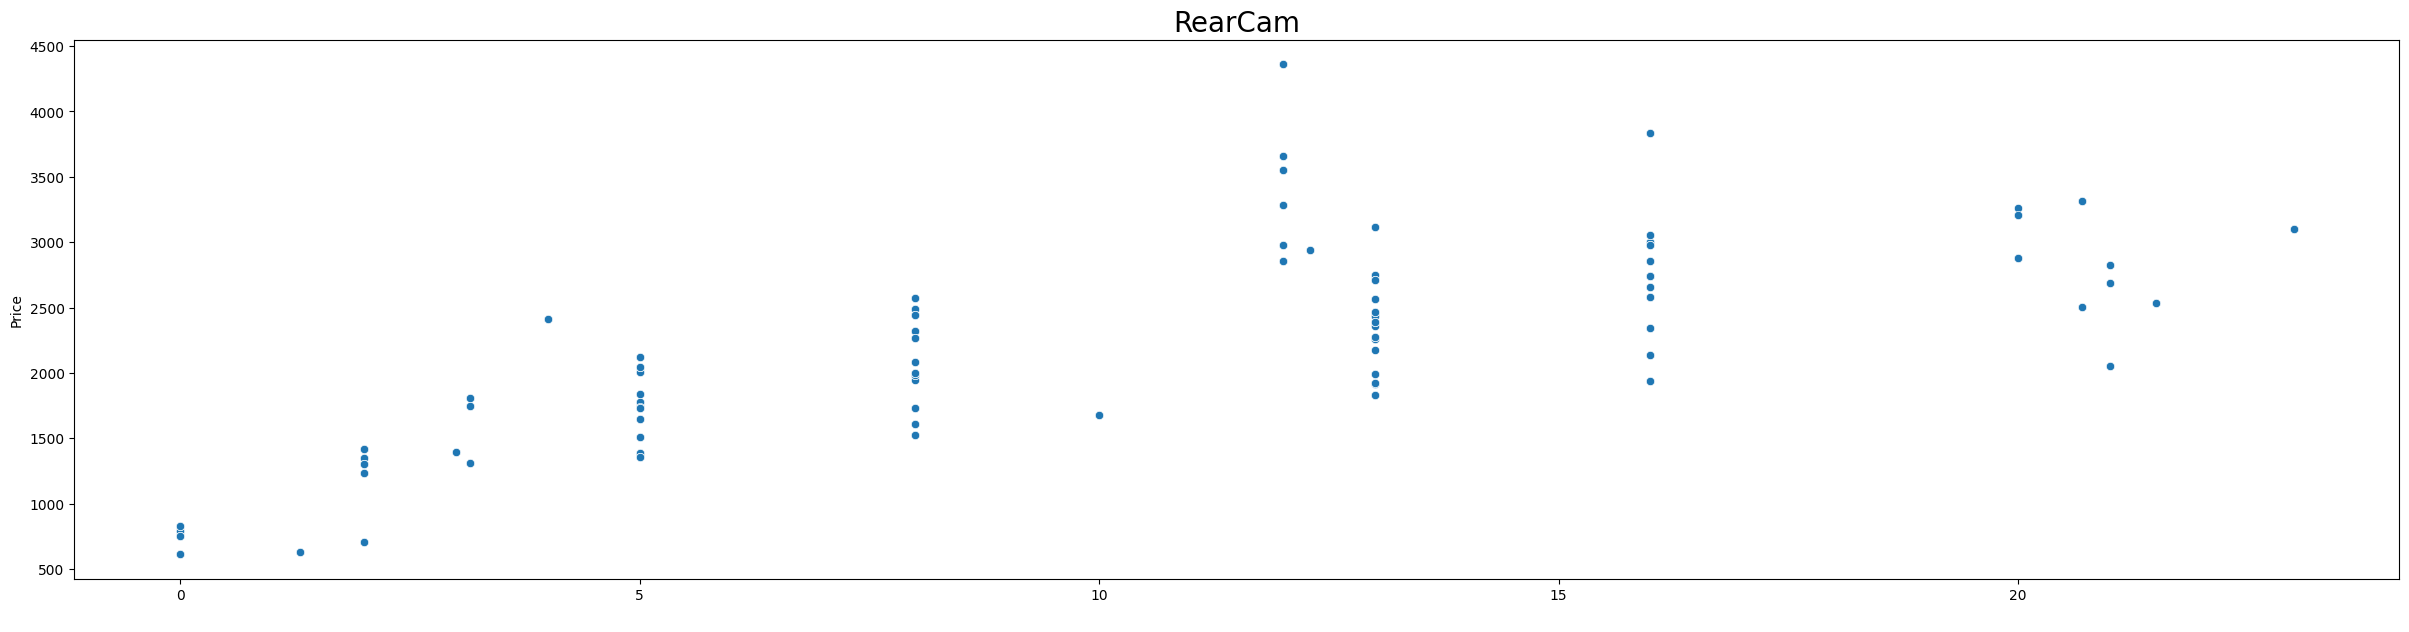

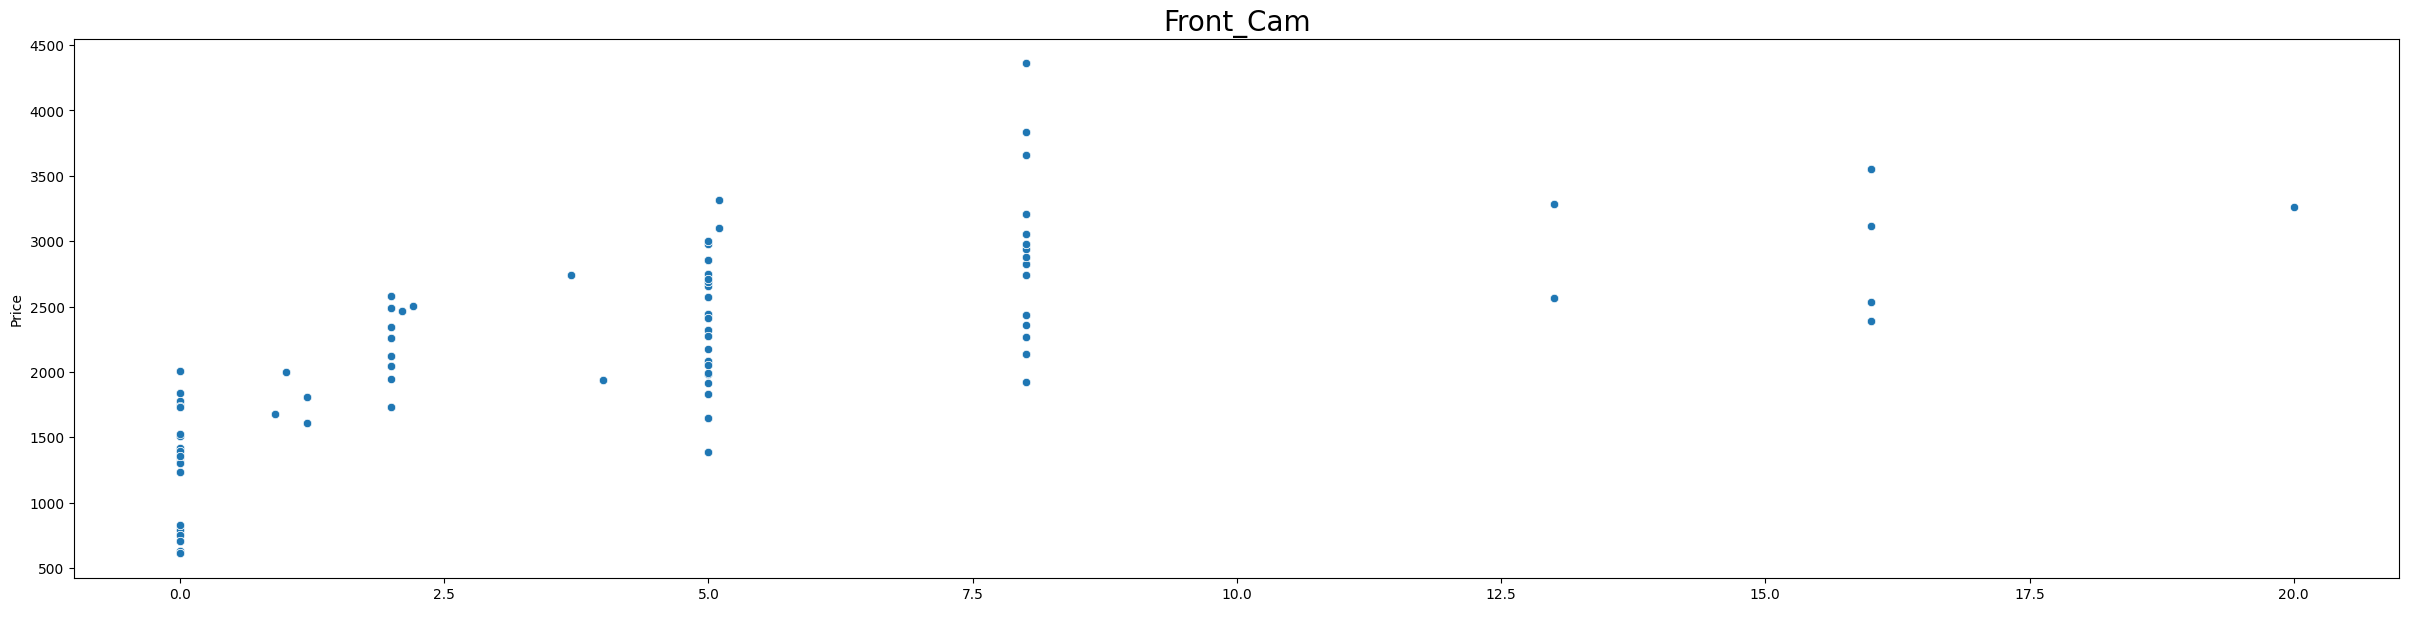

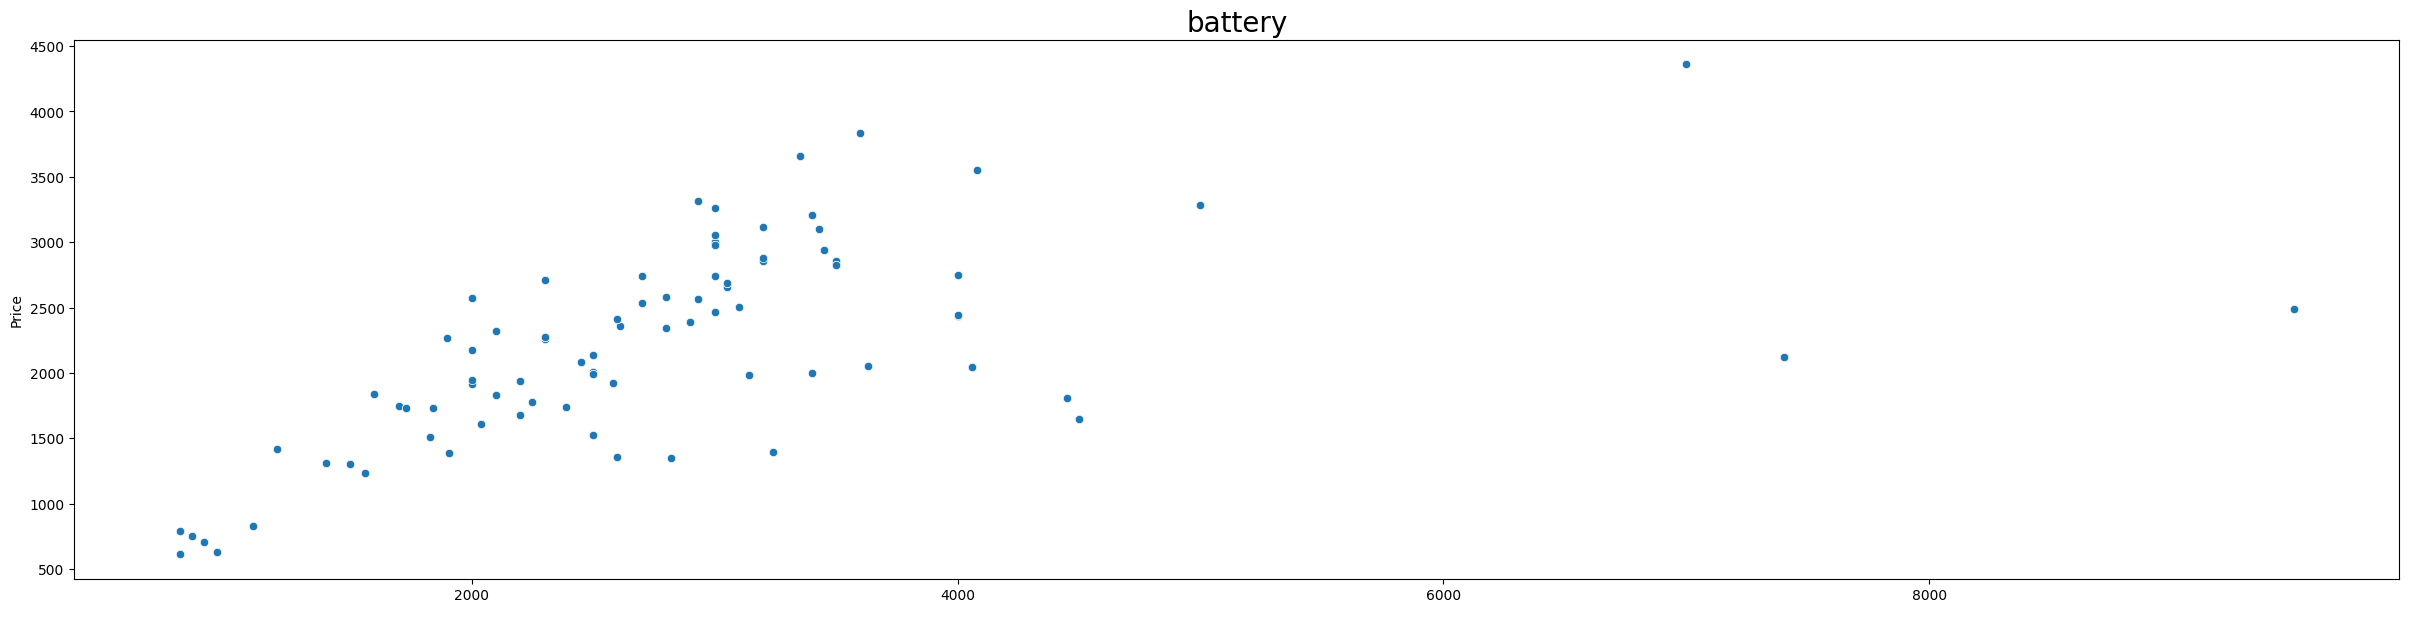

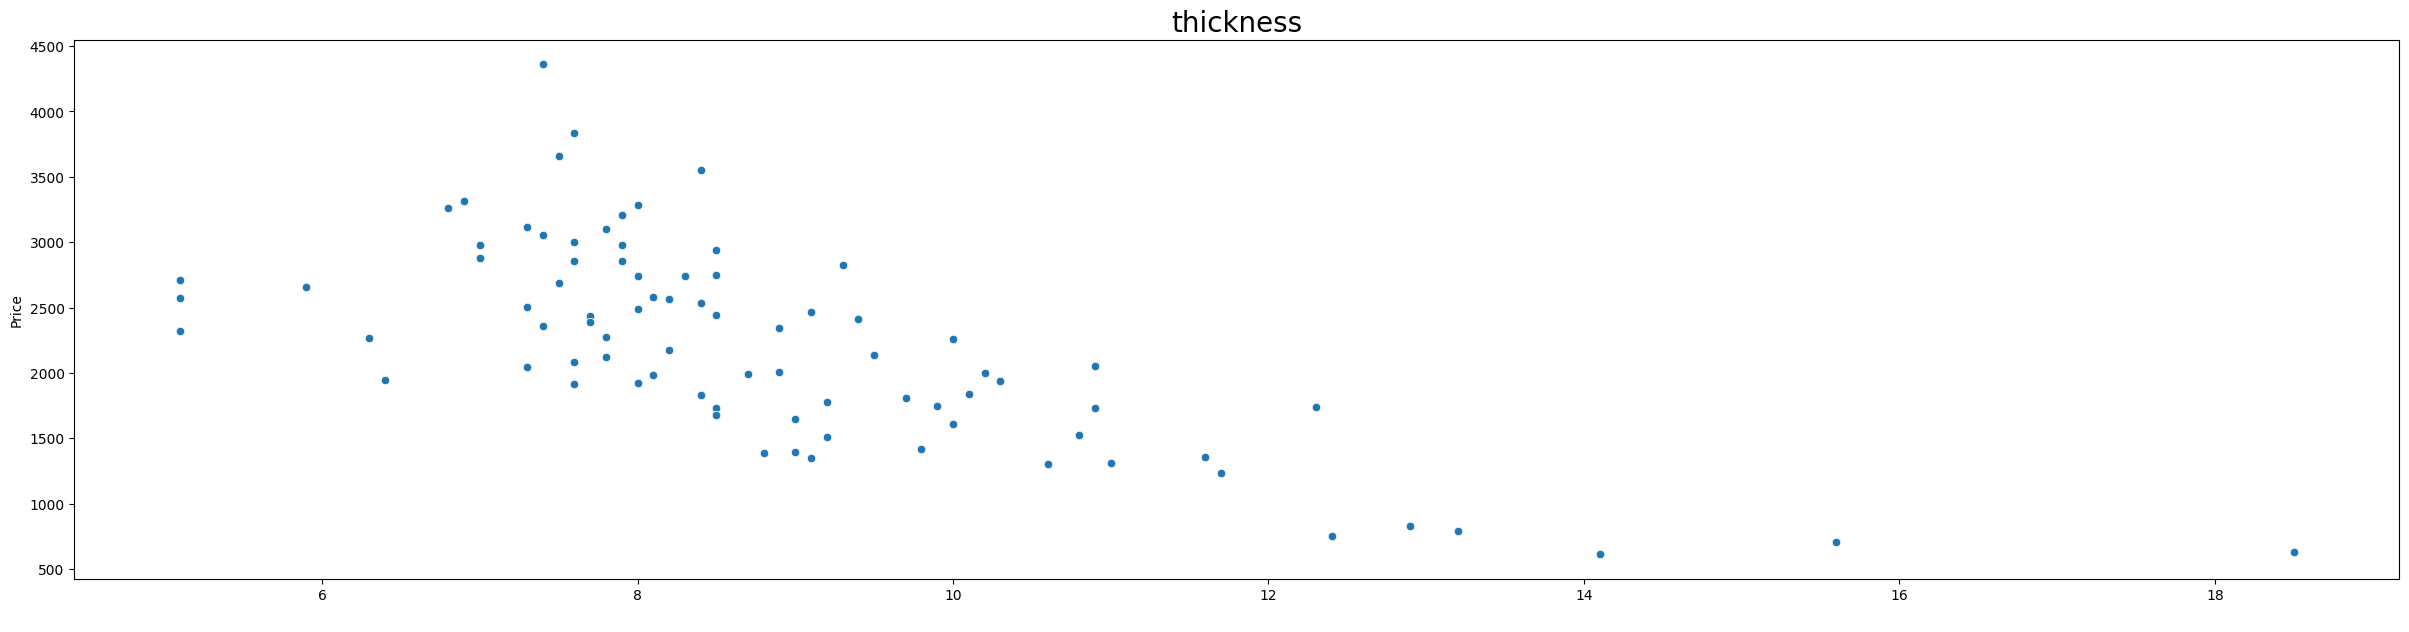

In [8]:
data1_target = data1["Price"]
# Scatter plot between all the independent variables and dependent variable
for col in data1_columns:
    plt.figure(figsize = (30,7))
    sns.scatterplot(data = data1, x = col, y = data1_target)
    plt.xlabel(" ")
    plt.title(col,size = 20)
    plt.show()

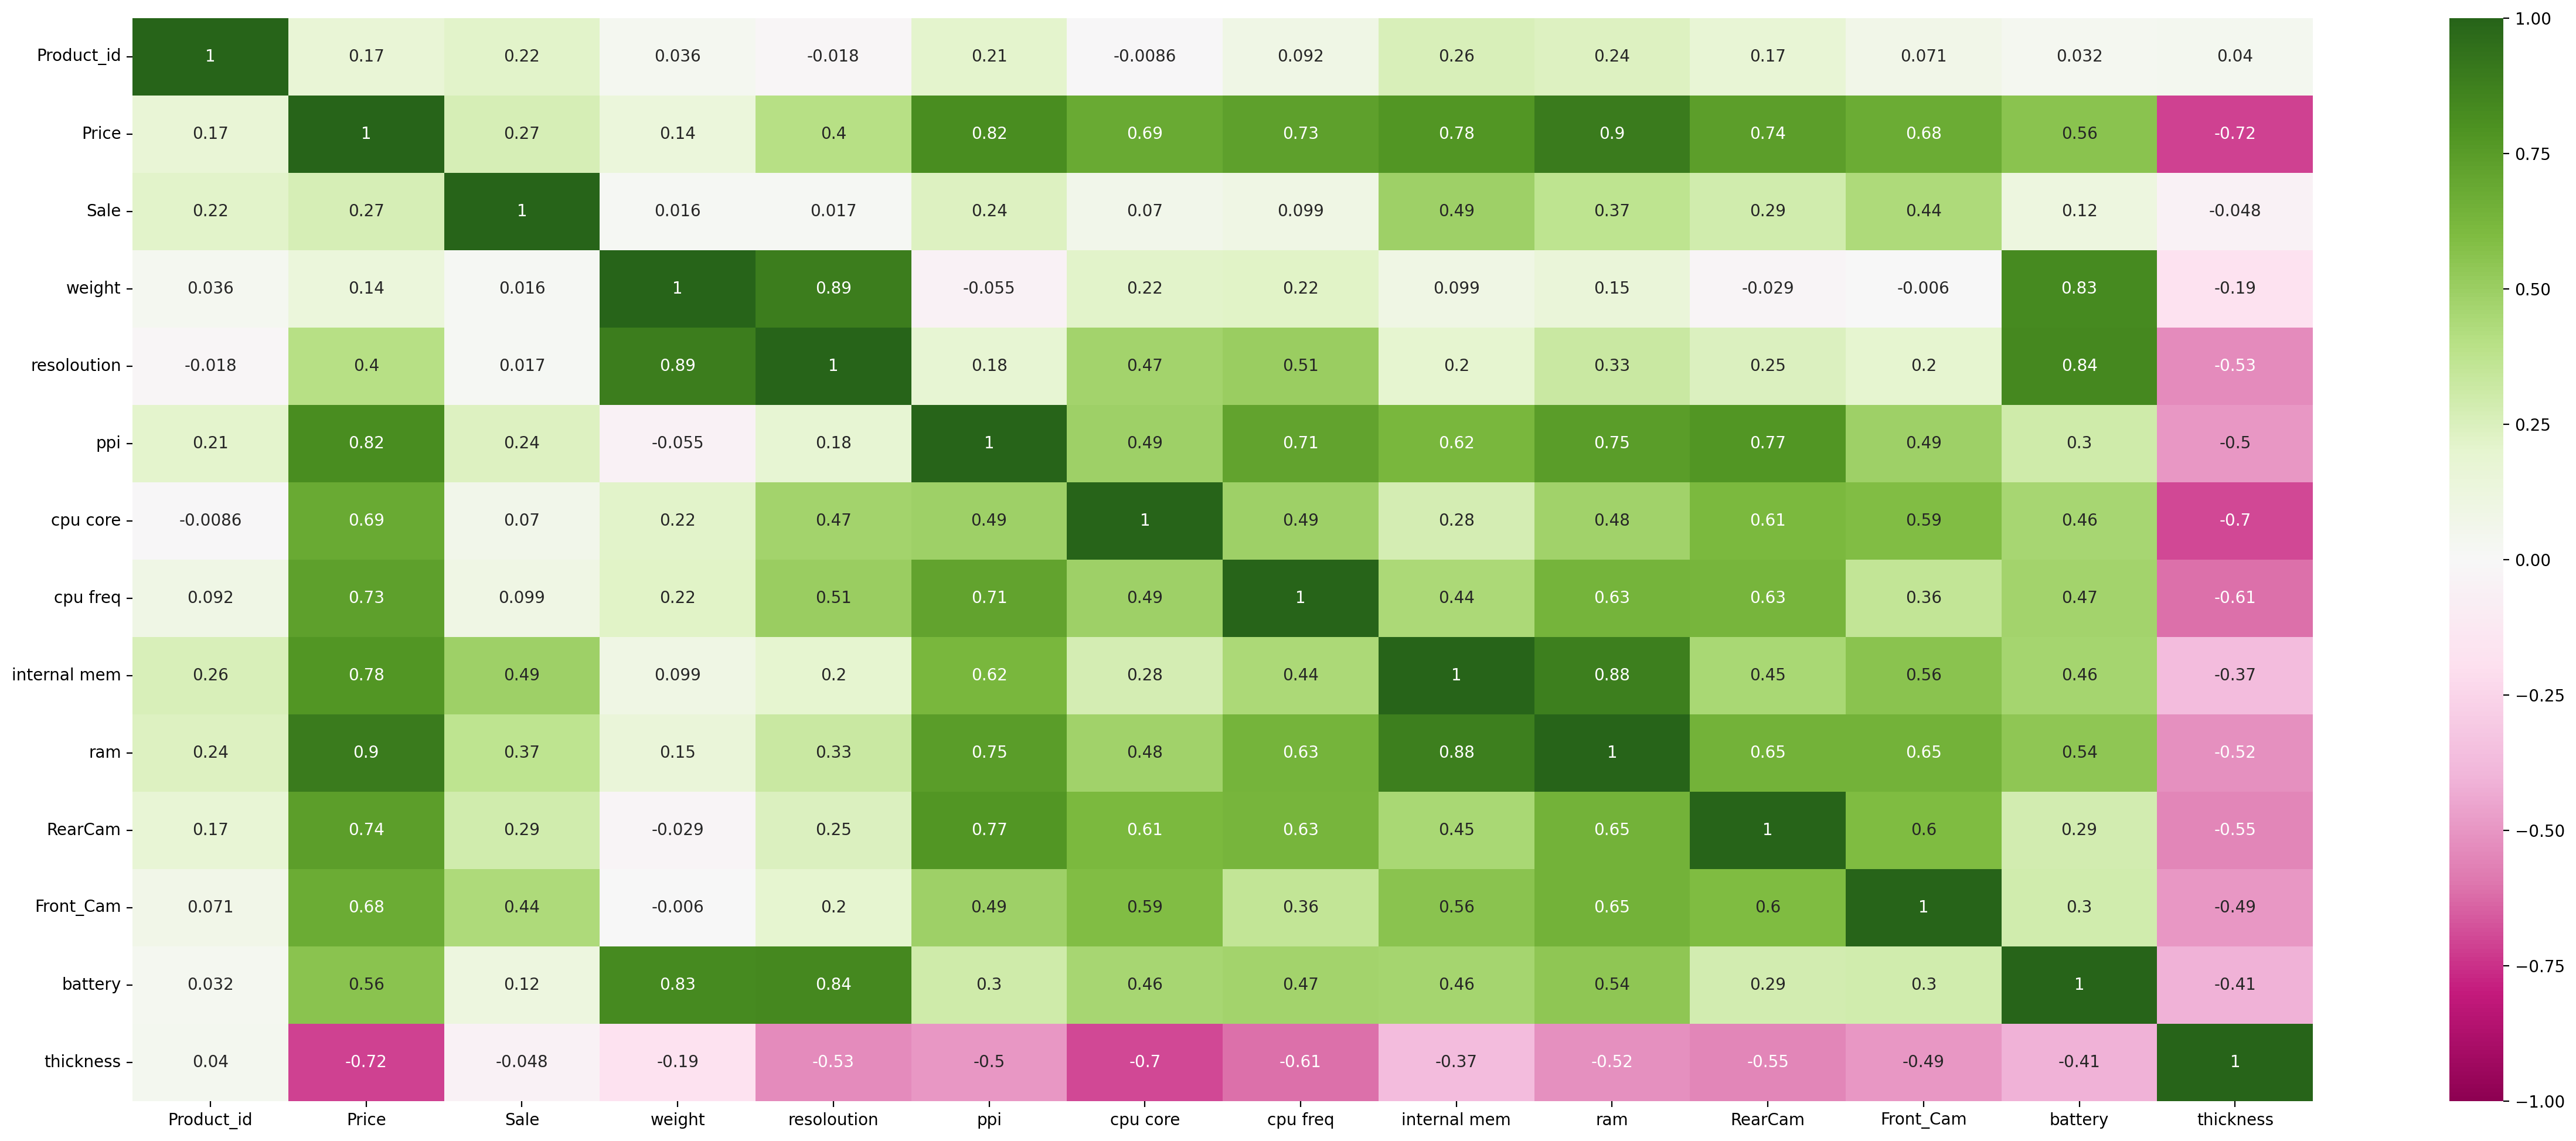

In [9]:
# Correlation between the independent and dependent variables
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(data1.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model with all features </p>

In [10]:
# Seperating out the independent and dependent variables
X = data1.drop("Price", axis = 1)
y = data1["Price"]

In [11]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.907361297930164
RMSE is: 212.2355249560636


In [12]:
# TRUE PERFORMANCE OF THE MODEL ON UNSEEN DATA
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

r2_score_cross_val: 0.9395305808239302


<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Residual plot & its kdeplot.</p>

These residual plots are very usefull in determing if Linear Regression was right choice.

**Key Points to note for are:**


1. Make sure that the points on the plot are random.
2. Make sure that there is no curve, straight line or parabola.
3. If 2. is true then dont use linear regression.
**Note** - If we have a perfect model. Then our resudials would be zero.<br>

4. Plot an kde plot of the residuals and make sure it is normally distributed or a bit skewed is fine.<br>
5. If you are still unsure if the kde is normally distributed or not, then use skew() method on the residuals (if 0 then is normally distributed).

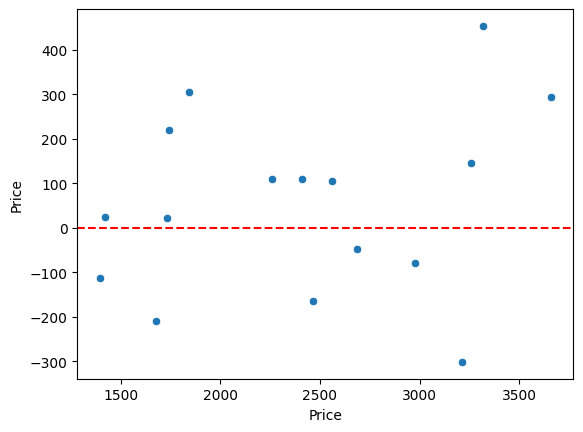

In [13]:
# Looking good.....
residuals = y_test - y_pred

sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

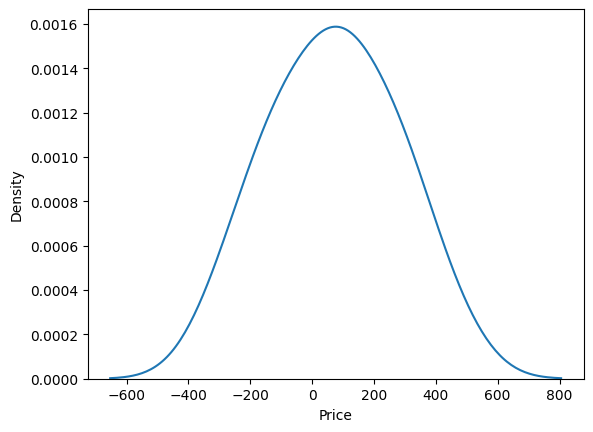

In [14]:
# Looks normally distributed to me.....
sns.kdeplot(residuals)
plt.show()

In [15]:
# Yes, pretty much normally distributed
residuals.skew()

0.011671196917708453

<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Selection with Backward Elimination</p>

In [16]:
# Seperating out the independent and dependent variables
X = data1.drop("Price", axis = 1)
y = data1["Price"]

In [17]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [18]:
backward_feature_selector = SequentialFeatureSelector(LinearRegression(positive=False,n_jobs = -1),
                                                      k_features = (1,13),
                                                      forward = False,floating=False,
                                                      scoring = "r2",
                                                      cv = 5,
                                                      verbose = 0).fit(X_train, y_train)

In [19]:
backward_feature_selector.k_feature_idx_

(2, 3, 4, 5, 6, 7, 8, 10, 11, 12)

In [20]:
backward_feature_selector.k_score_

0.9422363348937441

In [21]:
columnNames_after_FS = X.iloc[:,[2, 3, 4, 5, 6, 7, 8, 10, 11, 12]].columns

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model after Feature Selection </p>

In [22]:
# Seperating out the independent and dependent variables
X = data1.loc[:,columnNames_after_FS]
y = data1["Price"]

In [23]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9015589833303301
RMSE is: 218.7811466509338


In [24]:
# TRUE PERFORMANCE OF THE MODEL ON UNSEEN DATA
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

r2_score_cross_val: 0.9422363348937441


<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Residual plot & its kdeplot.</p>

These residual plots are very usefull in determing if Linear Regression was right choice.

**Key Points to note for are:**


1. Make sure that the points on the plot are random.
2. Make sure that there is no curve, straight line or parabola.
3. If 2. is true then dont use linear regression.
**Note** - If we have a perfect model. Then our resudials would be zero.<br>

4. Plot an kde plot of the residuals and make sure it is normally distributed or a bit skewed is fine.<br>
5. If you are still unsure if the kde is normally distributed or not, then use skew() method on the residuals (if 0 then is normally distributed).

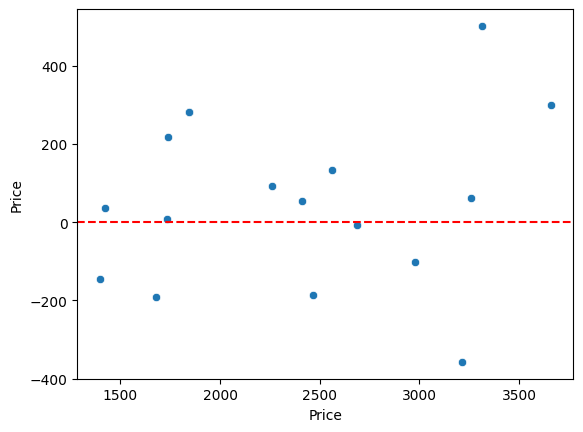

In [25]:
# Looking good.....
residuals = y_test - y_pred

sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

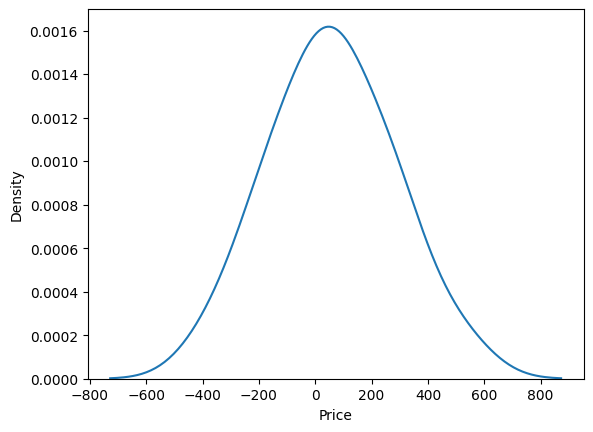

In [26]:
# Looks normally distributed to me.....
sns.kdeplot(residuals)
plt.show()

In [27]:
# Skewed by a bit is fine...
residuals.skew()

0.10303700451885325

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Final Model</p>

In [28]:
# Seperating out the independent and dependent variables
X = data1.loc[:,columnNames_after_FS]
y = data1["Price"]

In [29]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        161 non-null    float64
 1   resoloution   161 non-null    float64
 2   ppi           161 non-null    int64  
 3   cpu core      161 non-null    int64  
 4   cpu freq      161 non-null    float64
 5   internal mem  161 non-null    float64
 6   ram           161 non-null    float64
 7   Front_Cam     161 non-null    float64
 8   battery       161 non-null    int64  
 9   thickness     161 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 12.7 KB


In [30]:
# Let us assume that we are satified with the model.
# Now we make use of pipeline

column_names = X.columns

step1 = ColumnTransformer(transformers=[
    ("SS",StandardScaler(),column_names)
],remainder = "passthrough")

step2 = LinearRegression(positive=False)

pipe = Pipeline([
    ("step1",step1),
    ("step2",step2)
])

In [31]:
pipe.fit(X,y)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SS', StandardScaler(),
                                                  Index(['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'Front_Cam', 'battery', 'thickness'],
      dtype='object'))])),
                ('step2', LinearRegression())])

<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Coefficients of the Independent Features</p>

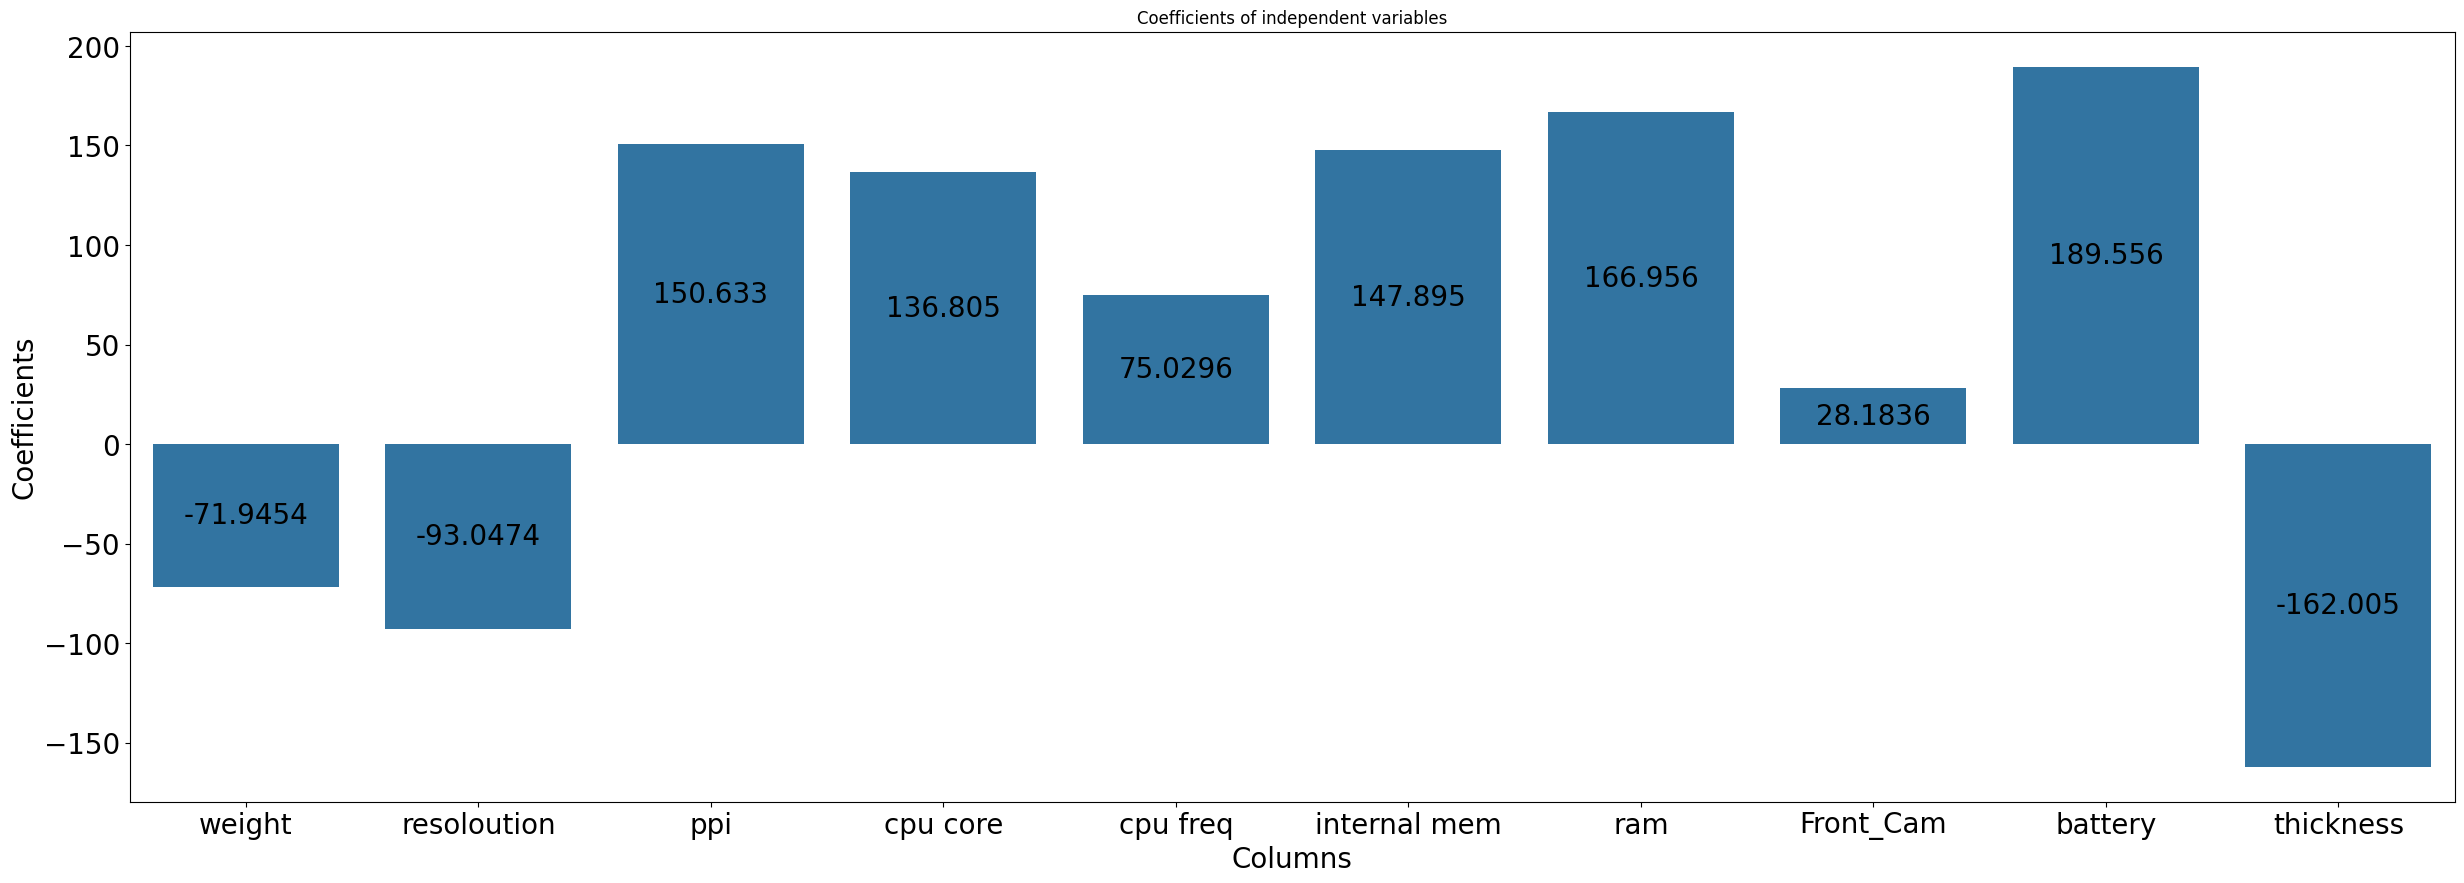

In [32]:
column_names = X.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": pipe["step2"].coef_})

plt.figure(figsize = (30,10))
ax = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(ax.containers[0],size=20,label_type="center")

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Columns",size = 20)
plt.ylabel("Coefficients",size = 20)
plt.title("Coefficients of independent variables")
plt.show()

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Saving and Loading a Model</p>

In [33]:
X.head()

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,Front_Cam,battery,thickness
0,135.0,5.2,424,8,1.35,16.0,3.000,8.0,2610,7.4
1,125.0,4.0,233,2,1.30,4.0,1.000,0.0,1700,9.9
2,110.0,4.7,312,4,1.20,8.0,1.500,5.0,2000,7.6
3,118.5,4.0,233,2,1.30,4.0,0.512,0.0,1400,11.0
4,125.0,4.0,233,2,1.30,4.0,1.000,0.0,1700,9.9


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        161 non-null    float64
 1   resoloution   161 non-null    float64
 2   ppi           161 non-null    int64  
 3   cpu core      161 non-null    int64  
 4   cpu freq      161 non-null    float64
 5   internal mem  161 non-null    float64
 6   ram           161 non-null    float64
 7   Front_Cam     161 non-null    float64
 8   battery       161 non-null    int64  
 9   thickness     161 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 12.7 KB


In [35]:
from joblib import dump, load

In [36]:
# We dumping the pipe model to our local system
dump(pipe, 'mobile_price_model.joblib')

['mobile_price_model.joblib']

In [37]:
# Loading the dumped model
loaded_model = load('mobile_price_model.joblib')

In [38]:
X.head()

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,Front_Cam,battery,thickness
0,135.0,5.2,424,8,1.35,16.0,3.000,8.0,2610,7.4
1,125.0,4.0,233,2,1.30,4.0,1.000,0.0,1700,9.9
2,110.0,4.7,312,4,1.20,8.0,1.500,5.0,2000,7.6
3,118.5,4.0,233,2,1.30,4.0,0.512,0.0,1400,11.0
4,125.0,4.0,233,2,1.30,4.0,1.000,0.0,1700,9.9


In [39]:
X['battery'].value_counts()

3000    13
2500     8
3200     6
4000     6
2300     6
2000     5
2100     4
2200     4
2700     4
3500     4
3400     4
2600     4
2930     4
3050     4
800      4
2800     4
5000     2
1500     2
7000     2
4450     2
1830     2
1100     2
3430     2
850      2
1900     2
950      2
1730     2
2580     2
900      2
9500     2
3100     2
4500     2
3630     2
4080     2
3600     2
2250     2
1400     2
1560     2
2040     2
3450     2
2900     2
1905     2
1200     2
7400     2
2450     2
3240     2
1600     2
2390     2
2820     2
3350     2
3140     2
1700     2
4060     2
1840     2
2610     1
Name: battery, dtype: int64

In [47]:

print ("Actual Price", data0.iloc[-1][['Price']])
to_predict = data0.iloc[-1:].drop("Price", axis = 1)

loaded_model.predict(to_predict)



Price    2536.0
Name: 160, dtype: float64


array([2486.82406095])

In [41]:
X.head()

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,Front_Cam,battery,thickness
0,135.0,5.2,424,8,1.35,16.0,3.000,8.0,2610,7.4
1,125.0,4.0,233,2,1.30,4.0,1.000,0.0,1700,9.9
2,110.0,4.7,312,4,1.20,8.0,1.500,5.0,2000,7.6
3,118.5,4.0,233,2,1.30,4.0,0.512,0.0,1400,11.0
4,125.0,4.0,233,2,1.30,4.0,1.000,0.0,1700,9.9


In [42]:
query = np.array([135.0,5.2,424,8,1.35,16.0,3,8,2610,7.4])
# query = query.reshape(1, 10)
column_names = ["weight", "resoloution", "ppi",
                "cpu core", "cpu freq", "internal mem", "ram",
                "Front_Cam", "battery", "thickness"]

# Create a DataFrame from your query with column names
query_df = pd.DataFrame(data=[query], columns=column_names)

In [43]:
# Making predictions.
loaded_model.predict(query_df)

array([2642.90106154])

In [45]:
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

# <p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank you.</p>

<p style="padding:10px;background-color:#010b13;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Please do consider upvoting. Feel free to comment.</p>